## Simulations of PPE using Bayesian Optimization

In this notebook, we will perform simulations for known probabilistic distributions of a target $Y$, aiming to evaluate the effectiveness of Bayesian Optimization (BO) for inferring an optimal set of hyperparameters. To achieve that, we will assume a probabilistic distribution $Y | \pmb{\theta} \sim \pi_{Y | \pmb{\theta}}$, where $\pmb{\theta}\sim\pi_{\pmb{\theta}}$, with $\pi_{\pmb{\theta}}$ belonging to a family of distributions that is indexed by a hyperparameter vector $\pmb{\lambda}$. For a fixed value $\pmb{\lambda_{\text{true}}}$, we will obtain simulated expert probabilities for a given partition, which we will subsequently use to perform PPE using BO. The experiment will involve partitions with different number of bins, and also different number of covariates $J$, whenever the target is dependent on a set of covariates, to test how efficient the method is with more detailed partitions and also more covariate sets for which there is expert input.

We will run simulations for three different families of probabilistic models. The first is the gaussian family, where we assume that $$Y\sim \mathcal{N}(\mu, \sigma^2),$$ with different possible priors then used to define $\mu$ and $\sigma$.

The second probabilistic model family again assumes that $Y$ is drawn from a gaussian distribution, but now the mean is estimated as a linear combination of a set of covariates $x_1,...,x_n$:
$$Y\sim\mathcal{N}(b_0 + \prod_{i=1}^{n}b_i\cdot x_i, \sigma^2),$$

where $b_i \sim \mathcal{N}(\mu_i, \sigma_i)$.

The third family is that of logistic regression, where $Y$ is now binary and a function of covariates x = \{$x_1,...,x_n$\}. In probabilistic notation, we have:

$$Y\sim\mathcal{B}(p(\pmb{x}, \pmb{\theta})),$$

where $p(\pmb{x}, \pmb{\theta}) = \frac{e^{\pmb{x}^{\Tau} \pmb{\theta}}}{1 + e^{\pmb{x}^{\Tau} \pmb{\theta}}}$, with $\theta_i \sim \mathcal{N}(\mu_i, \sigma_i^2)$.


In [2]:
## imports

import numpy as np
from functions import make_partition, ppe_simulation, plot_histograms, plot_densities, wasserstein_metric

## Model Family 1: Gaussian distribution with no covariates

For the first model family, we will test two models, namely Model 1 and Model 2. For each, we will implement PPE with BO, considering multiple partitionings, each with a different number of bins. We will test partitionings with 2, 5, 10 and 20 bins. The way we construct the partitionings is by taking an area where $Y$ is "more likely to be into", and partition it according to the number of bins. Then, we also consider two additional partitions for the lower and upper tails of the distribution so that the total number of bins is the one desired. In this example, we choose such area by taking a wide enough interval around the prior's mean value for the mean parameter of the target.

In [3]:
from gaussian_models import gaussian_model_1, gaussian_model_2

In [4]:
num_bins = np.array([2, 5, 10, 20])

lower_inner_gaussian = 5 - 20
upper_inner_gaussian = 5 + 20

gaussian_partitions = [make_partition(n, lower_inner_gaussian, upper_inner_gaussian) for n in num_bins]

### Model 1

For the first model, we assume that $Y\sim \mathcal{N}(\mu, \sigma^2)$, where $\mu \sim \mathcal{N}(\mu_1, \sigma_1)$ and $\sigma \sim \text{Gamma}(a, b)$. Our hyperparameter vector is then $\pmb{\lambda} = [\mu_1, \sigma_1, a, b]$. For the simulation, we assume that $\mu_1 = 5, \sigma_1 = 2, a = 2$ and $b = 3$.

In [5]:
mu_1 = 5 ; sigma_1 = 2 ; a = 2 ; b = 3

lambd_names_gaussian_1 = ["mu_1", "sigma_1", "a", "b"] ## hyperparameter names
lambd_true_vals_gaussian_1 = np.array([mu_1, sigma_1, a, b])
param_bounds_gaussian_1 = [[-10., 10.], [0.001, 10.], [0.001, 10.], [0.001, 10.]] ## bounds for each hyperparameter

target_type = "continuous"
target_samples = 1500
J = 1


simulated_expert_probs_gaussian_1 = []
best_params_gaussian_1 = []
best_probs_gaussian_1 = []
alphas_gaussian_1 = []
llik_gaussian_1 = []
was_distance_gaussian_1 = []


for i in range(len(num_bins)):

    expert_probs, best_params, best_probs, alpha, llik = ppe_simulation(model = gaussian_model_1,
                                                                  J = J,
                                                                  target_type = target_type,
                                                                  lambd_names = lambd_names_gaussian_1,
                                                                  lambd_true_vals = lambd_true_vals_gaussian_1,
                                                                  alpha = None,
                                                                  num_bins = num_bins[i],
                                                                  lower_inner = lower_inner_gaussian,
                                                                  upper_inner = upper_inner_gaussian,
                                                                  param_bounds = param_bounds_gaussian_1,
                                                                  target_samples = target_samples)
    
    print(f"Simulation {i+1} out of {len(num_bins)} finished.")
    
    simulated_expert_probs_gaussian_1.append(expert_probs)
    best_params_gaussian_1.append(best_params)
    best_probs_gaussian_1.append(best_probs)
    alphas_gaussian_1.append(alpha)
    llik_gaussian_1.append(llik)
    was_distance_gaussian_1.append(wasserstein_metric(best_probs = best_probs, expert_probs = expert_probs, J = J))

Sampling: [Y_obs, mu, sigma]
[INFO 07-04 14:44:35] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 14:44:35] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 14:44:35] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter a. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 14:44:35] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter b. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 

Simulation 1 out of 4 finished.


Sampling: [Y_obs, mu, sigma]
[INFO 07-04 14:45:56] ax.service.managed_loop: Running optimization trial 4...
Sampling: [Y_obs, mu, sigma]
[INFO 07-04 14:45:56] ax.service.managed_loop: Running optimization trial 5...
Sampling: [Y_obs, mu, sigma]
[INFO 07-04 14:45:56] ax.service.managed_loop: Running optimization trial 6...
Sampling: [Y_obs, mu, sigma]
[INFO 07-04 14:45:56] ax.service.managed_loop: Running optimization trial 7...
Sampling: [Y_obs, mu, sigma]
[INFO 07-04 14:45:56] ax.service.managed_loop: Running optimization trial 8...
Sampling: [Y_obs, mu, sigma]
[INFO 07-04 14:45:56] ax.service.managed_loop: Running optimization trial 9...
Sampling: [Y_obs, mu, sigma]
[INFO 07-04 14:45:56] ax.service.managed_loop: Running optimization trial 10...
Sampling: [Y_obs, mu, sigma]
[INFO 07-04 14:45:57] ax.service.managed_loop: Running optimization trial 11...
Sampling: [Y_obs, mu, sigma]
[INFO 07-04 14:45:57] ax.service.managed_loop: Running optimization trial 12...
Sampling: [Y_obs, mu, sig

Simulation 2 out of 4 finished.


[INFO 07-04 14:46:36] ax.service.managed_loop: Running optimization trial 4...
Sampling: [Y_obs, mu, sigma]
[INFO 07-04 14:46:36] ax.service.managed_loop: Running optimization trial 5...
Sampling: [Y_obs, mu, sigma]
[INFO 07-04 14:46:36] ax.service.managed_loop: Running optimization trial 6...
Sampling: [Y_obs, mu, sigma]
[INFO 07-04 14:46:36] ax.service.managed_loop: Running optimization trial 7...
Sampling: [Y_obs, mu, sigma]
[INFO 07-04 14:46:36] ax.service.managed_loop: Running optimization trial 8...
Sampling: [Y_obs, mu, sigma]
[INFO 07-04 14:46:36] ax.service.managed_loop: Running optimization trial 9...
Sampling: [Y_obs, mu, sigma]
[INFO 07-04 14:46:37] ax.service.managed_loop: Running optimization trial 10...
Sampling: [Y_obs, mu, sigma]
[INFO 07-04 14:46:37] ax.service.managed_loop: Running optimization trial 11...
Sampling: [Y_obs, mu, sigma]
[INFO 07-04 14:46:37] ax.service.managed_loop: Running optimization trial 12...
Sampling: [Y_obs, mu, sigma]
[INFO 07-04 14:46:38] ax.

Simulation 3 out of 4 finished.


Sampling: [Y_obs, mu, sigma]
[INFO 07-04 14:47:26] ax.service.managed_loop: Running optimization trial 4...
Sampling: [Y_obs, mu, sigma]
[INFO 07-04 14:47:26] ax.service.managed_loop: Running optimization trial 5...
Sampling: [Y_obs, mu, sigma]
[INFO 07-04 14:47:26] ax.service.managed_loop: Running optimization trial 6...
Sampling: [Y_obs, mu, sigma]
[INFO 07-04 14:47:26] ax.service.managed_loop: Running optimization trial 7...
Sampling: [Y_obs, mu, sigma]
[INFO 07-04 14:47:26] ax.service.managed_loop: Running optimization trial 8...
Sampling: [Y_obs, mu, sigma]
[INFO 07-04 14:47:26] ax.service.managed_loop: Running optimization trial 9...
Sampling: [Y_obs, mu, sigma]
[INFO 07-04 14:47:26] ax.service.managed_loop: Running optimization trial 10...
Sampling: [Y_obs, mu, sigma]
[INFO 07-04 14:47:27] ax.service.managed_loop: Running optimization trial 11...
Sampling: [Y_obs, mu, sigma]
[INFO 07-04 14:47:28] ax.service.managed_loop: Running optimization trial 12...
Sampling: [Y_obs, mu, sig

Simulation 4 out of 4 finished.


In [67]:
print("Best parameters from PPE:", best_params_gaussian_1)
print("Resulting alpha:", alphas_gaussian_1)
print("Negative dirichlet log likelihood:", llik_gaussian_1)
print("Wasserstein distance between simulated expert probabilities and result prior predictive probabilities:", was_distance_gaussian_1)

Best parameters from PPE: [{'mu_1': 5.414314745858853, 'sigma_1': 10.0, 'a': 2.9149252053049155, 'b': 8.715187022601818, 'alpha': 70.0}, {'mu_1': 5.023582041859223, 'sigma_1': 1.908365273684404, 'a': 8.037895732304209, 'b': 7.535873336457852}, {'mu_1': 5.051973569080847, 'sigma_1': 2.3525360971380374, 'a': 2.6005575546552513, 'b': 5.534483336207274}, {'mu_1': 5.010995785187841, 'sigma_1': 2.332045387531719, 'a': 0.8318318542372399, 'b': 3.0511652940439324}]
Resulting alpha: [Array(770.76605, dtype=float32), Array(4878.119, dtype=float32), Array(904.7581, dtype=float32), Array(4313.682, dtype=float32)]
Negative dirichlet log likelihood: [-1.8856430053710938, -22.617420196533203, -44.7490234375, -109.75439453125]
Wasserstein distance between simulated expert probabilities and result prior predictive probabilities: [0.009333333333333332, 0.0005333322666687925, 0.003466645866791449, 0.003733288533870931]


Sampling: [Y_obs, mu, sigma]
Sampling: [Y_obs, mu, sigma]
Sampling: [Y_obs, mu, sigma]
Sampling: [Y_obs, mu, sigma]
Sampling: [Y_obs, mu, sigma]


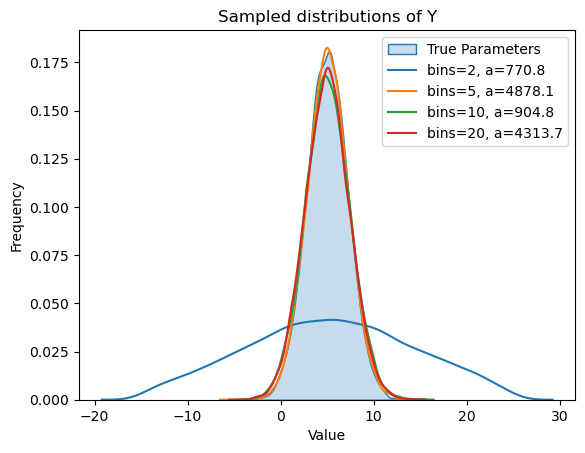

In [6]:
#for i in range(len(num_bins)):
#
#    plot_histograms(model = gaussian_model_1,
#               lambd_names = lambd_names_gaussian_1,
#               lambd_true_vals = lambd_true_vals_gaussian_1,
#               best_params = best_params_gaussian_1[i],
#               alpha = alphas_gaussian_1[i],
#               J = J,
#               num_bins = num_bins[i],
#               partitions=gaussian_partitions[i],
#               lower_inner = lower_inner_gaussian,
#               upper_inner = upper_inner_gaussian)

plot_densities(model = gaussian_model_1,
               J = J,
               lambd_names = lambd_names_gaussian_1,
               lambd_true_vals = lambd_true_vals_gaussian_1,
               best_params_total = best_params_gaussian_1,
               alpha_total = alphas_gaussian_1,
               num_bins = num_bins,
               lower_inner = lower_inner_gaussian,
               upper_inner = upper_inner_gaussian)

### Model 2

Similar to Model 1, we assume for Model 2 that $Y\sim \mathcal{N}(\mu, \sigma^2)$, where $\mu \sim \mathcal{N}(\mu_1, \sigma_1)$ and $\sigma \sim \text{Gamma}(a, b)$. The difference is that now we also assume hyperpriors for the parameters of $\mu$'s prior, specifically $\mu_1\sim\mathcal{N}(\mu_m, \sigma_m)$ and $\sigma_1 \sim \mathcal{LN}(\mu_s, \sigma_s)$, where $\mathcal{LN}$ is the log-gaussian distribution. This implies a hyperparameter vector $\pmb{\lambda} = [\mu_m, \sigma_m, \mu_s, \sigma_s, a, b]$. For the simulation, we assume that $\mu_m = 5, \sigma_m = 1, \mu_s = 0.4, \sigma_m = 4, a = 2$ and $b = 3$.

In [7]:
mu_m = 5 ; sigma_m = 1 ; mu_s = 0.4 ; sigma_s = 4 ; a = 2 ; b = 3

lambd_names_gaussian_2 = ["mu_m", "sigma_m", "mu_s", "sigma_s", "a", "b"] ## hyperparameter names
lambd_true_vals_gaussian_2 = np.array([mu_m, sigma_m, mu_s, sigma_s, a, b])
param_bounds_gaussian_2 = [[-10., 10.], [0.001, 10.], [-10., 10.], [0.001, 10.], [0.001, 10.], [0.001, 10.]] ## bounds for each hyperparameter

target_type = "continuous"
target_samples = 1500
J = 1


simulated_expert_probs_gaussian_2 = []
best_params_gaussian_2 = []
best_probs_gaussian_2 = []
alphas_gaussian_2 = []
llik_gaussian_2 = []
was_distance_gaussian_2 = []


for i in range(len(num_bins)):

    expert_probs, best_params, best_probs, alpha, llik = ppe_simulation(model = gaussian_model_2,
                                                                  J = J,
                                                                  target_type = target_type,
                                                                  lambd_names = lambd_names_gaussian_2,
                                                                  lambd_true_vals = lambd_true_vals_gaussian_2,
                                                                  alpha = None,
                                                                  num_bins = num_bins[i],
                                                                  lower_inner = lower_inner_gaussian,
                                                                  upper_inner = upper_inner_gaussian,
                                                                  param_bounds = param_bounds_gaussian_2,
                                                                  target_samples = target_samples)
    
    print(f"Simulation {i+1} out of {len(num_bins)} finished.")
    
    simulated_expert_probs_gaussian_2.append(expert_probs)
    best_params_gaussian_2.append(best_params)
    best_probs_gaussian_2.append(best_probs)
    alphas_gaussian_2.append(alpha)
    llik_gaussian_2.append(llik)
    was_distance_gaussian_2.append(wasserstein_metric(best_probs = best_probs, expert_probs = expert_probs, J = J))

Sampling: [Y_obs, mu, mu_hyp, sigma, sigma_hyp]
[INFO 07-04 14:48:11] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_m. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 14:48:11] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_m. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 14:48:11] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_s. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 14:48:11] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_s. If that is not the expected value type, you can explicitly specify 'value_type'

Simulation 1 out of 4 finished.


[INFO 07-04 14:49:17] ax.service.managed_loop: Running optimization trial 4...
Sampling: [Y_obs, mu, mu_hyp, sigma, sigma_hyp]
[INFO 07-04 14:49:17] ax.service.managed_loop: Running optimization trial 5...
Sampling: [Y_obs, mu, mu_hyp, sigma, sigma_hyp]
[INFO 07-04 14:49:17] ax.service.managed_loop: Running optimization trial 6...
Sampling: [Y_obs, mu, mu_hyp, sigma, sigma_hyp]
[INFO 07-04 14:49:17] ax.service.managed_loop: Running optimization trial 7...
Sampling: [Y_obs, mu, mu_hyp, sigma, sigma_hyp]
[INFO 07-04 14:49:17] ax.service.managed_loop: Running optimization trial 8...
Sampling: [Y_obs, mu, mu_hyp, sigma, sigma_hyp]
[INFO 07-04 14:49:18] ax.service.managed_loop: Running optimization trial 9...
Sampling: [Y_obs, mu, mu_hyp, sigma, sigma_hyp]
[INFO 07-04 14:49:18] ax.service.managed_loop: Running optimization trial 10...
Sampling: [Y_obs, mu, mu_hyp, sigma, sigma_hyp]
[INFO 07-04 14:49:18] ax.service.managed_loop: Running optimization trial 11...
Sampling: [Y_obs, mu, mu_hyp, 

Simulation 2 out of 4 finished.


[INFO 07-04 14:50:23] ax.service.managed_loop: Running optimization trial 4...
Sampling: [Y_obs, mu, mu_hyp, sigma, sigma_hyp]
[INFO 07-04 14:50:23] ax.service.managed_loop: Running optimization trial 5...
Sampling: [Y_obs, mu, mu_hyp, sigma, sigma_hyp]
[INFO 07-04 14:50:23] ax.service.managed_loop: Running optimization trial 6...
Sampling: [Y_obs, mu, mu_hyp, sigma, sigma_hyp]
[INFO 07-04 14:50:23] ax.service.managed_loop: Running optimization trial 7...
Sampling: [Y_obs, mu, mu_hyp, sigma, sigma_hyp]
[INFO 07-04 14:50:23] ax.service.managed_loop: Running optimization trial 8...
Sampling: [Y_obs, mu, mu_hyp, sigma, sigma_hyp]
[INFO 07-04 14:50:23] ax.service.managed_loop: Running optimization trial 9...
Sampling: [Y_obs, mu, mu_hyp, sigma, sigma_hyp]
[INFO 07-04 14:50:23] ax.service.managed_loop: Running optimization trial 10...
Sampling: [Y_obs, mu, mu_hyp, sigma, sigma_hyp]
[INFO 07-04 14:50:23] ax.service.managed_loop: Running optimization trial 11...
Sampling: [Y_obs, mu, mu_hyp, 

Simulation 3 out of 4 finished.


[INFO 07-04 14:51:46] ax.service.managed_loop: Running optimization trial 4...
Sampling: [Y_obs, mu, mu_hyp, sigma, sigma_hyp]
INFO:pymc.sampling.forward:Sampling: [Y_obs, mu, mu_hyp, sigma, sigma_hyp]
[INFO 07-04 14:51:46] ax.service.managed_loop: Running optimization trial 5...
Sampling: [Y_obs, mu, mu_hyp, sigma, sigma_hyp]
INFO:pymc.sampling.forward:Sampling: [Y_obs, mu, mu_hyp, sigma, sigma_hyp]
[INFO 07-04 14:51:46] ax.service.managed_loop: Running optimization trial 6...
Sampling: [Y_obs, mu, mu_hyp, sigma, sigma_hyp]
INFO:pymc.sampling.forward:Sampling: [Y_obs, mu, mu_hyp, sigma, sigma_hyp]
[INFO 07-04 14:51:46] ax.service.managed_loop: Running optimization trial 7...
Sampling: [Y_obs, mu, mu_hyp, sigma, sigma_hyp]
INFO:pymc.sampling.forward:Sampling: [Y_obs, mu, mu_hyp, sigma, sigma_hyp]
[INFO 07-04 14:51:46] ax.service.managed_loop: Running optimization trial 8...
Sampling: [Y_obs, mu, mu_hyp, sigma, sigma_hyp]
INFO:pymc.sampling.forward:Sampling: [Y_obs, mu, mu_hyp, sigma, s

Simulation 4 out of 4 finished.


In [66]:
print("Best parameters from PPE:", best_params_gaussian_2)
print("Resulting alpha:", alphas_gaussian_2)
print("Negative dirichlet log likelihood:", llik_gaussian_2)
print("Wasserstein distance between simulated expert probabilities and result prior predictive probabilities:", was_distance_gaussian_2)

Best parameters from PPE: [{'mu_m': -1.6173573168317805, 'sigma_m': 9.323673416909372, 'mu_s': 9.450644852156593, 'sigma_s': 1.633062658097657, 'a': 5.004611032145734, 'b': 7.125079554101132, 'alpha': 70.0}, {'mu_m': 5.069232990254434, 'sigma_m': 2.9254147737826535, 'mu_s': -5.441926590819656, 'sigma_s': 10.0, 'a': 2.899791597933515, 'b': 1.4558326759222326}, {'mu_m': 4.958063197864579, 'sigma_m': 2.5957973616867447, 'mu_s': -2.59760726252172, 'sigma_s': 8.756247753334524, 'a': 1.6267496874609988, 'b': 1.7756634892008383}, {'mu_m': 5.014361808743299, 'sigma_m': 1.4197306590218948, 'mu_s': 0.5555874231086584, 'sigma_s': 3.3754359480439513, 'a': 5.1719821648793065, 'b': 10.0}]
Resulting alpha: [Array(717.1647, dtype=float32), Array(338.8006, dtype=float32), Array(495.5455, dtype=float32), Array(513.1307, dtype=float32)]
Negative dirichlet log likelihood: [-1.8841590881347656, -13.5924072265625, -28.95458984375, -66.9190673828125]
Wasserstein distance between simulated expert probabilitie

Sampling: [Y_obs, mu, mu_hyp, sigma, sigma_hyp]
INFO:pymc.sampling.forward:Sampling: [Y_obs, mu, mu_hyp, sigma, sigma_hyp]
Sampling: [Y_obs, mu, mu_hyp, sigma, sigma_hyp]
INFO:pymc.sampling.forward:Sampling: [Y_obs, mu, mu_hyp, sigma, sigma_hyp]
Sampling: [Y_obs, mu, mu_hyp, sigma, sigma_hyp]
INFO:pymc.sampling.forward:Sampling: [Y_obs, mu, mu_hyp, sigma, sigma_hyp]
Sampling: [Y_obs, mu, mu_hyp, sigma, sigma_hyp]
INFO:pymc.sampling.forward:Sampling: [Y_obs, mu, mu_hyp, sigma, sigma_hyp]
Sampling: [Y_obs, mu, mu_hyp, sigma, sigma_hyp]
INFO:pymc.sampling.forward:Sampling: [Y_obs, mu, mu_hyp, sigma, sigma_hyp]


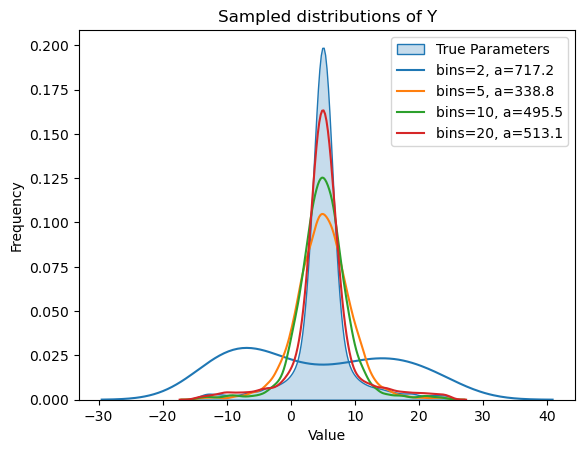

In [9]:
#for i in range(len(num_bins)):
#
#    plot_histograms(model = gaussian_model_2,
#               lambd_names = lambd_names_gaussian_2,
#               lambd_true_vals = lambd_true_vals_gaussian_2,
#               best_params = best_params_gaussian_2[i],
#               alpha = alphas_gaussian_2[i],
#               J = J,
#               num_bins = num_bins[i],
#               partitions=gaussian_partitions[i],
#               lower_inner = lower_inner_gaussian,
#               upper_inner = upper_inner_gaussian)

plot_densities(model = gaussian_model_2,
               J = J,
               lambd_names = lambd_names_gaussian_2,
               lambd_true_vals = lambd_true_vals_gaussian_2,
               best_params_total = best_params_gaussian_2,
               alpha_total = alphas_gaussian_2,
               num_bins = num_bins,
               lower_inner = lower_inner_gaussian,
               upper_inner = upper_inner_gaussian)

## Model Family 2: Bayesian Linear Regression model

We now consider the model $Y\sim\mathcal{N}(b_0 + \prod_{i=1}^{n}b_i\cdot x_i, \sigma^2)$, where $b_i \sim \mathcal{N}(\mu_i, \sigma_i)$. Our hyperparameter vector is then $\pmb{\lambda}=[\sigma, \mu_1, \sigma_1, \mu_2, \sigma_2, ..., \mu_n, \sigma_n]$. We consider three values for $n$, specifically $n\in{1,2,4}$, corresponding to three different probabilistic models for $Y$. The first (Model 1) has 5 hyperparameters, the second (Model 2) has 7 and the third (Model 3) has 11.

To test each of the three models, we will have different partitions with 2, 5, 10 and 20 bins, while we will also test how PPE performs with different number of covariate sets $J=2, 5, 10$.

In [10]:
from linear_models import linear_model_1, linear_model_2, linear_model_3

In [11]:
num_bins = np.array([2, 5, 10, 20])

lower_inner_blr = -70
upper_inner_blr = 70

blr_partitions = [make_partition(n, lower_inner_blr, upper_inner_blr) for n in num_bins]

### Model 1

In [12]:
## y = β0 + β1*x1 + ε, βi ~ N(μi,σi^2), ε~Ν(0,σ^2)

mu_0 = 3
sigma_0 = 1

mu_1 = 1
sigma_1 = 2

sigma = 4


lambd_true_vals_blr_1 = [mu_0, sigma_0, mu_1, sigma_1, sigma]
lambd_names_blr_1 = ['mu_0', 'sigma_0', 'mu_1', 'sigma_1', 'sigma']

param_bounds_blr_1 = [[-10., 10.], [0.001, 10.], [-10., 10.], [0.001, 10.], [0.001, 10.]] ## bounds for each hyperparameter

target_type = "continuous"
target_samples = 1500

#### J=2

In [13]:
covs_blr_1_1 = np.array([[1., 0.],
                       [1., 3.]]) ## 1st column is the intercept

J_1 = covs_blr_1_1.shape[0]

linear_model_blr_1_1 = lambda lambd, n_samples: linear_model_1(lambd, covs_blr_1_1, n_samples)


simulated_expert_probs_blr_1_1 = []
best_params_blr_1_1 = []
best_probs_blr_1_1 = []
alphas_blr_1_1 = []
llik_blr_1_1 = []
was_distance_blr_1_1 = []


for i in range(len(num_bins)):

    expert_probs, best_params, best_probs, alpha, llik = ppe_simulation(model = linear_model_blr_1_1,
                                                                  J = J_1,
                                                                  target_type = target_type,
                                                                  lambd_names = lambd_names_blr_1,
                                                                  lambd_true_vals = lambd_true_vals_blr_1,
                                                                  alpha = None,
                                                                  num_bins = num_bins[i],
                                                                  lower_inner = lower_inner_blr,
                                                                  upper_inner = upper_inner_blr,
                                                                  param_bounds = param_bounds_blr_1,
                                                                  target_samples = target_samples)
    
    print(f"Simulation {i+1} out of {len(num_bins)} finished.")
    
    simulated_expert_probs_blr_1_1.append(expert_probs)
    best_params_blr_1_1.append(best_params)
    best_probs_blr_1_1.append(best_probs)
    alphas_blr_1_1.append(alpha)
    llik_blr_1_1.append(llik)
    was_distance_blr_1_1.append(wasserstein_metric(best_probs = best_probs, expert_probs = expert_probs, J = J_1))

Sampling: [Y_obs, b_0, b_1]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1]
[INFO 07-04 14:53:52] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 14:53:52] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 14:53:52] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 14:53:52] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value type, you 

Simulation 1 out of 4 finished.


[INFO 07-04 14:55:21] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 14:55:21] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 14:55:21] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 14:55:21] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter 

Simulation 2 out of 4 finished.


[INFO 07-04 14:56:56] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 14:56:56] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 14:56:56] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 14:56:56] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter 

Simulation 3 out of 4 finished.


[INFO 07-04 14:59:07] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 14:59:07] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 14:59:07] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 14:59:07] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter 

Simulation 4 out of 4 finished.


In [65]:
print("Best parameters from PPE:", best_params_blr_1_1)
print("Resulting alpha:", alphas_blr_1_1)
print("Negative dirichlet log likelihood:", llik_blr_1_1)
print("Wasserstein distance between simulated expert probabilities and result prior predictive probabilities:", was_distance_blr_1_1)

Best parameters from PPE: [{'mu_0': 10.0, 'sigma_0': 7.395195134153065, 'mu_1': 6.49001325904138, 'sigma_1': 10.0, 'sigma': 3.9334676053006272, 'alpha': 70.0}, {'mu_0': -0.40975186576536515, 'sigma_0': 1.221223659501353, 'mu_1': 1.4816235239025737, 'sigma_1': 2.3406567686971314, 'sigma': 0.4467312829396172}, {'mu_0': 1.1810516094597894, 'sigma_0': 10.0, 'mu_1': 0.9678529044626387, 'sigma_1': 2.044762657921996, 'sigma': 3.866516201845396}, {'mu_0': 4.22008829482624, 'sigma_0': 7.444662606846612, 'mu_1': 0.9141212730977912, 'sigma_1': 2.0138348728215076, 'sigma': 4.088740687844573}]
Resulting alpha: [Array(1342.8118, dtype=float32), Array(8186.1685, dtype=float32), Array(3997.567, dtype=float32), Array(4563.5283, dtype=float32)]
Negative dirichlet log likelihood: [-3.8754119873046875, -47.75516891479492, -135.65234375, -247.9375]
Wasserstein distance between simulated expert probabilities and result prior predictive probabilities: [0.00788424061023002, 0.0024573819086728625, 0.0074601996

Sampling: [Y_obs, b_0, b_1]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1]


Sampling: [Y_obs, b_0, b_1]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1]
Sampling: [Y_obs, b_0, b_1]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1]
Sampling: [Y_obs, b_0, b_1]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1]
Sampling: [Y_obs, b_0, b_1]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1]


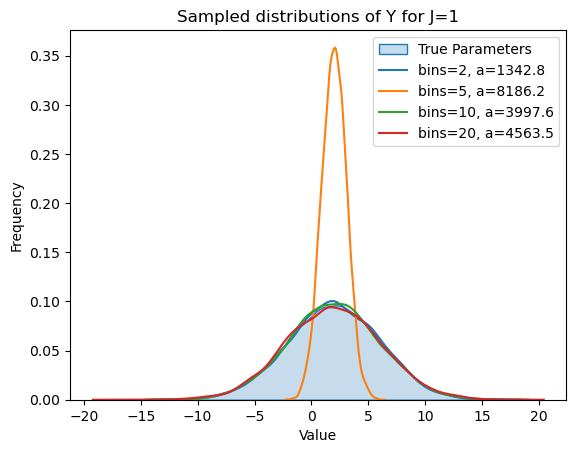

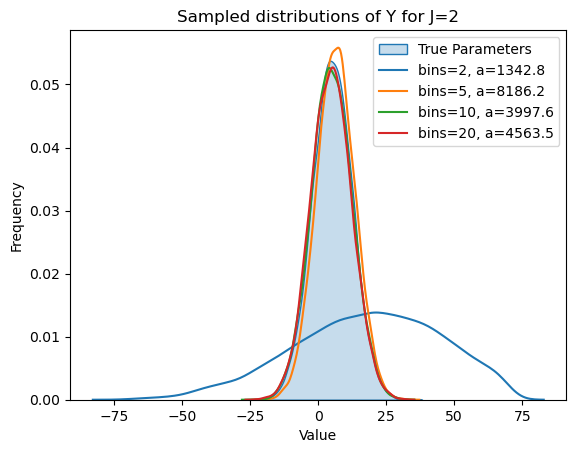

In [14]:
#for i in range(len(num_bins)):

#    plot_histograms(model = linear_model_blr_1_1,
#               lambd_names = lambd_names_blr_1,
#               lambd_true_vals = lambd_true_vals_blr_1,
#               best_params = best_params_blr_1_1[i],
#               alpha = alphas_blr_1_1[i],
#               J = J_1,
#               num_bins = num_bins[i],
#               partitions=blr_partitions[i],
#               lower_inner = lower_inner_blr,
#               upper_inner = upper_inner_blr)


plot_densities(model = linear_model_blr_1_1,
               J = J_1,
               lambd_names = lambd_names_blr_1,
               lambd_true_vals = lambd_true_vals_blr_1,
               best_params_total = best_params_blr_1_1,
               alpha_total = alphas_blr_1_1,
               num_bins = num_bins,
               lower_inner = lower_inner_blr,
               upper_inner = upper_inner_blr)

#### J=5

In [15]:
covs_blr_1_2 = np.array([[1., -2.],
                         [1., 1.],
                         [1., 0.],
                         [1., 1.],
                         [1., 2.]]) ## 1st column is the intercept

J_2 = covs_blr_1_2.shape[0]

linear_model_blr_1_2 = lambda lambd, n_samples: linear_model_1(lambd, covs_blr_1_2, n_samples)


simulated_expert_probs_blr_1_2 = []
best_params_blr_1_2 = []
best_probs_blr_1_2 = []
alphas_blr_1_2 = []
llik_blr_1_2 = []
was_distance_blr_1_2 = []


for i in range(len(num_bins)):

    expert_probs, best_params, best_probs, alpha, llik = ppe_simulation(model = linear_model_blr_1_2,
                                                                  J = J_2,
                                                                  target_type = target_type,
                                                                  lambd_names = lambd_names_blr_1,
                                                                  lambd_true_vals = lambd_true_vals_blr_1,
                                                                  alpha = None,
                                                                  num_bins = num_bins[i],
                                                                  lower_inner = lower_inner_blr,
                                                                  upper_inner = upper_inner_blr,
                                                                  param_bounds = param_bounds_blr_1,
                                                                  target_samples = target_samples)
    
    print(f"Simulation {i+1} out of {len(num_bins)} finished.")
    
    simulated_expert_probs_blr_1_2.append(expert_probs)
    best_params_blr_1_2.append(best_params)
    best_probs_blr_1_2.append(best_probs)
    alphas_blr_1_2.append(alpha)
    llik_blr_1_2.append(llik)
    was_distance_blr_1_2.append(wasserstein_metric(best_probs = best_probs, expert_probs = expert_probs, J = J_2))


Sampling: [Y_obs, b_0, b_1]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1]
[INFO 07-04 15:01:25] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:01:25] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:01:25] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:01:25] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value type, you 

Simulation 1 out of 4 finished.


[INFO 07-04 15:03:50] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:03:50] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:03:50] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:03:50] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter 

Simulation 2 out of 4 finished.


[INFO 07-04 15:05:42] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:05:42] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:05:42] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:05:42] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter 

Simulation 3 out of 4 finished.


[INFO 07-04 15:07:55] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:07:55] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:07:55] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:07:55] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter 

Simulation 4 out of 4 finished.


In [68]:
print("Best parameters from PPE:", best_params_blr_1_2)
print("Resulting alpha:", alphas_blr_1_2)
print("Negative dirichlet log likelihood:", llik_blr_1_2)
print("Wasserstein distance between simulated expert probabilities and result prior predictive probabilities:", was_distance_blr_1_2)

Best parameters from PPE: [{'mu_0': -6.90177765179431, 'sigma_0': 1.5634949421262694, 'mu_1': 1.4019255418726946, 'sigma_1': 3.1940449341267705, 'sigma': 3.5081195274085673}, {'mu_0': 1.31256374193714, 'sigma_0': 8.482583125861234, 'mu_1': -0.4698134827482079, 'sigma_1': 2.523058738203583, 'sigma': 6.104887843158232}, {'mu_0': -0.8700224778307444, 'sigma_0': 3.8048367740951474, 'mu_1': 0.9790772878892042, 'sigma_1': 0.7713506923732986, 'sigma': 6.434309392386655}, {'mu_0': 10.0, 'sigma_0': 8.49388982430342, 'mu_1': 0.94464282023743, 'sigma_1': 2.2556652557366887, 'sigma': 4.939266086396611}]
Resulting alpha: [Array(217.49724, dtype=float32), Array(134.39728, dtype=float32), Array(162.12794, dtype=float32), Array(315.1331, dtype=float32)]
Negative dirichlet log likelihood: [41.83935546875, -122.92694091796875, -211.524658203125, -432.8590087890625]
Wasserstein distance between simulated expert probabilities and result prior predictive probabilities: [0.025158859274617352, 0.002986893798

Sampling: [Y_obs, b_0, b_1]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1]
Sampling: [Y_obs, b_0, b_1]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1]
Sampling: [Y_obs, b_0, b_1]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1]
Sampling: [Y_obs, b_0, b_1]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1]
Sampling: [Y_obs, b_0, b_1]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1]


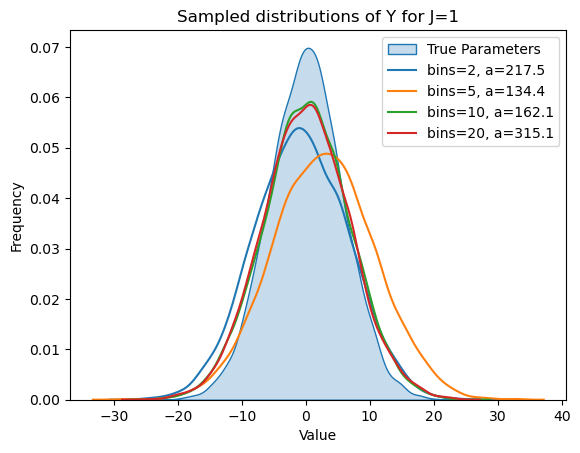

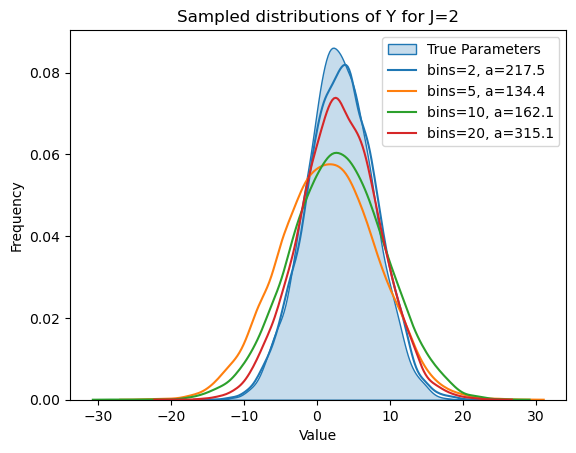

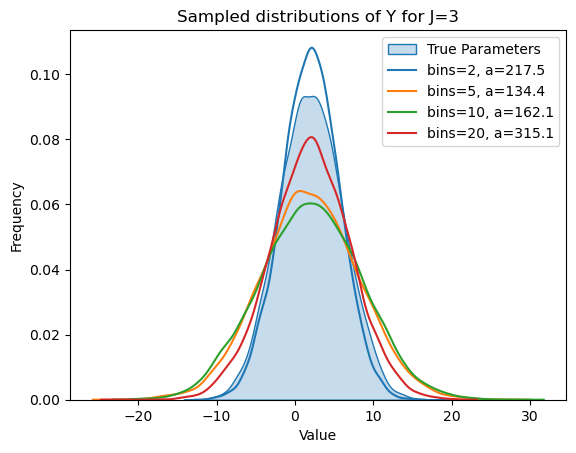

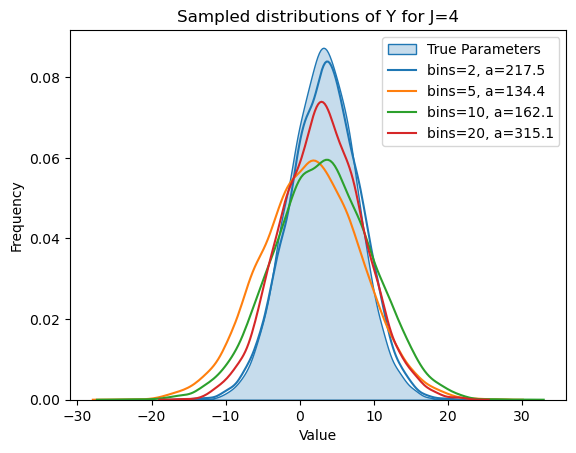

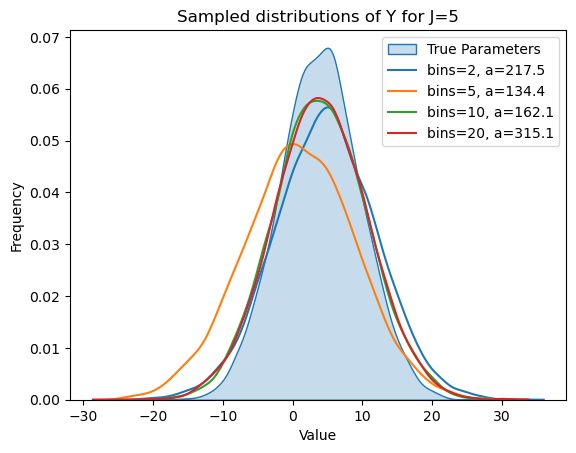

In [16]:
#for i in range(len(num_bins)):
#
#    plot_histograms(model = linear_model_blr_1_2,
#               lambd_names = lambd_names_blr_1,
#               lambd_true_vals = lambd_true_vals_blr_1,
#               best_params = best_params_blr_1_2[i],
#               alpha = alphas_blr_1_2[i],
#               J = J_2,
#               num_bins = num_bins[i],
#               partitions=blr_partitions[i],
#               lower_inner = lower_inner_blr,
#               upper_inner = upper_inner_blr)
    
plot_densities(model = linear_model_blr_1_2,
               J = J_2,
               lambd_names = lambd_names_blr_1,
               lambd_true_vals = lambd_true_vals_blr_1,
               best_params_total = best_params_blr_1_2,
               alpha_total = alphas_blr_1_2,
               num_bins = num_bins,
               lower_inner = lower_inner_blr,
               upper_inner = upper_inner_blr)

#### J=10

In [17]:
covs_blr_1_3 = np.array([[1., -5.],
                         [1., -4.],
                         [1., -3.],
                         [1., -2.],
                         [1., 1.],
                         [1., 0.],
                         [1., 1.],
                         [1., 2.],
                         [1., 3.],
                         [1., 4.]]) ## 1st column is the intercept

J_3 = covs_blr_1_3.shape[0]

linear_model_blr_1_3 = lambda lambd, n_samples: linear_model_1(lambd, covs_blr_1_3, n_samples)


simulated_expert_probs_blr_1_3 = []
best_params_blr_1_3 = []
best_probs_blr_1_3 = []
alphas_blr_1_3 = []
llik_blr_1_3 = []
was_distance_blr_1_3 = []


for i in range(len(num_bins)):

    expert_probs, best_params, best_probs, alpha, llik = ppe_simulation(model = linear_model_blr_1_3,
                                                                  J = J_3,
                                                                  target_type = target_type,
                                                                  lambd_names = lambd_names_blr_1,
                                                                  lambd_true_vals = lambd_true_vals_blr_1,
                                                                  alpha = None,
                                                                  num_bins = num_bins[i],
                                                                  lower_inner = lower_inner_blr,
                                                                  upper_inner = upper_inner_blr,
                                                                  param_bounds = param_bounds_blr_1,
                                                                  target_samples = target_samples)
    
    print(f"Simulation {i+1} out of {len(num_bins)} finished.")
    
    simulated_expert_probs_blr_1_3.append(expert_probs)
    best_params_blr_1_3.append(best_params)
    best_probs_blr_1_3.append(best_probs)
    alphas_blr_1_3.append(alpha)
    llik_blr_1_3.append(llik)
    was_distance_blr_1_3.append(wasserstein_metric(best_probs = best_probs, expert_probs = expert_probs, J = J_3))


Sampling: [Y_obs, b_0, b_1]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1]
[INFO 07-04 15:10:49] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:10:49] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:10:49] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:10:49] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value type, you 

Simulation 1 out of 4 finished.


[INFO 07-04 15:12:49] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:12:49] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:12:49] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:12:49] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter 

Simulation 2 out of 4 finished.


[INFO 07-04 15:14:56] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:14:56] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:14:56] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:14:56] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter 

Simulation 3 out of 4 finished.


[INFO 07-04 15:17:23] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:17:23] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:17:23] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:17:23] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter 

Simulation 4 out of 4 finished.


In [69]:
print("Best parameters from PPE:", best_params_blr_1_3)
print("Resulting alpha:", alphas_blr_1_3)
print("Negative dirichlet log likelihood:", llik_blr_1_3)
print("Wasserstein distance between simulated expert probabilities and result prior predictive probabilities:", was_distance_blr_1_3)

Best parameters from PPE: [{'mu_0': -10.0, 'sigma_0': 10.0, 'mu_1': 2.2086666560035884, 'sigma_1': 4.870751101498329, 'sigma': 3.49520589759033}, {'mu_0': -10.0, 'sigma_0': 5.039064097352858, 'mu_1': 0.3653813345371777, 'sigma_1': 0.9746544643905156, 'sigma': 7.639985555293222}, {'mu_0': 10.0, 'sigma_0': 1.185511692867514, 'mu_1': 0.9022401348902083, 'sigma_1': 2.094743261018075, 'sigma': 5.775146945853479}, {'mu_0': -10.0, 'sigma_0': 6.890881221343813, 'mu_1': 1.197399115627407, 'sigma_1': 2.38805912892321, 'sigma': 4.536678824654052}]
Resulting alpha: [Array(114.948814, dtype=float32), Array(124.69588, dtype=float32), Array(194.62025, dtype=float32), Array(388.44165, dtype=float32)]
Negative dirichlet log likelihood: [-8.678619384765625, -202.00311279296875, -376.7434997558594, -871.366943359375]
Wasserstein distance between simulated expert probabilities and result prior predictive probabilities: [0.04861359120657515, 0.009667175522818585, 0.06782868495283684, 0.06935559530181022]


Sampling: [Y_obs, b_0, b_1]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1]
Sampling: [Y_obs, b_0, b_1]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1]
Sampling: [Y_obs, b_0, b_1]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1]
Sampling: [Y_obs, b_0, b_1]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1]
Sampling: [Y_obs, b_0, b_1]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1]


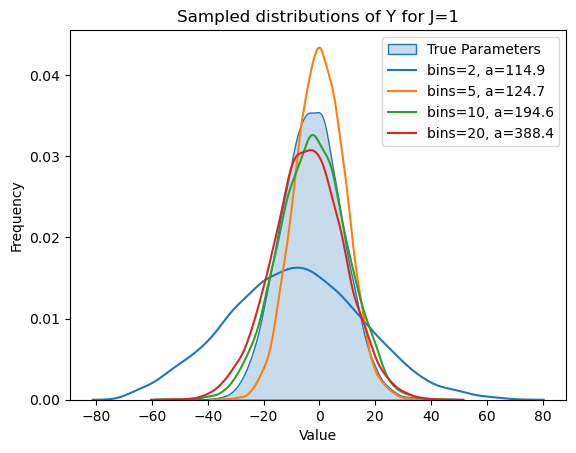

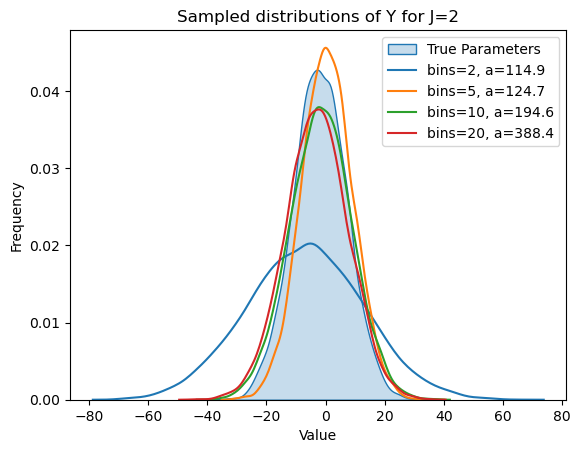

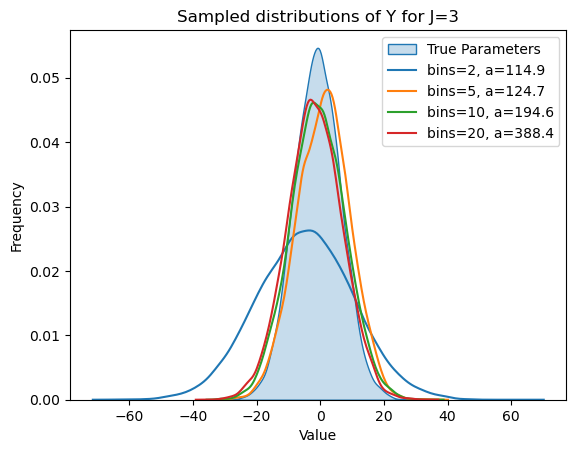

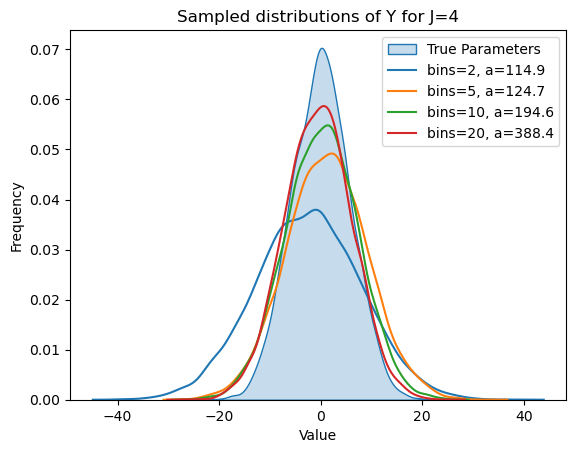

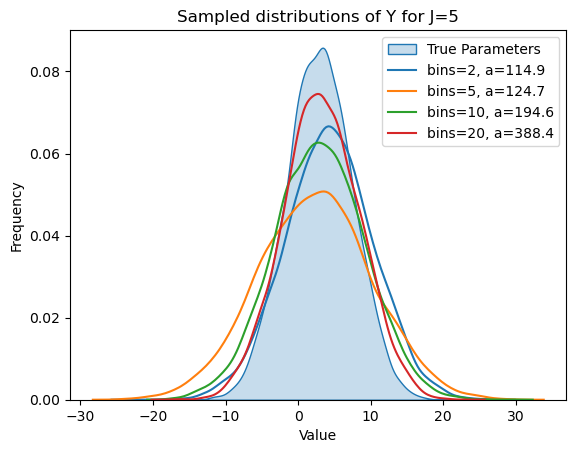

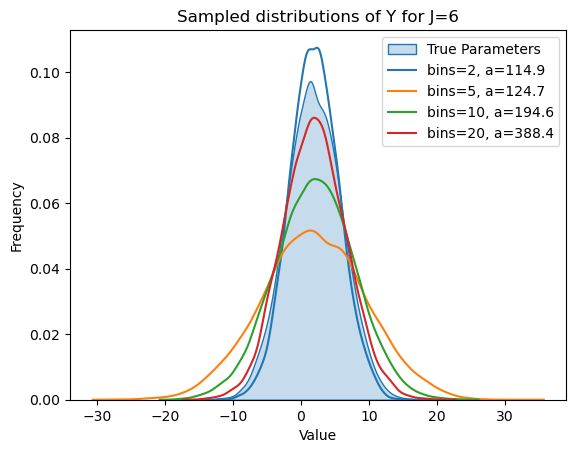

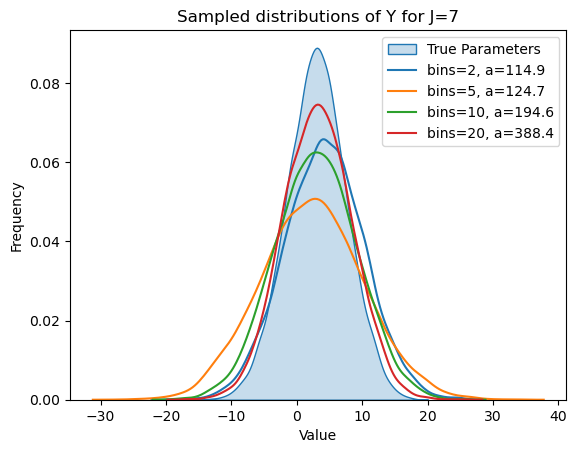

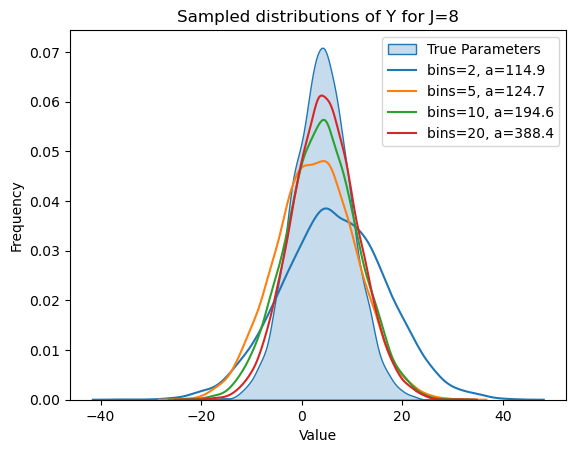

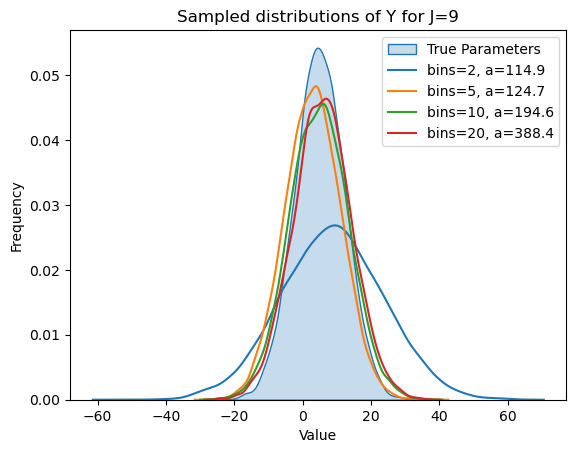

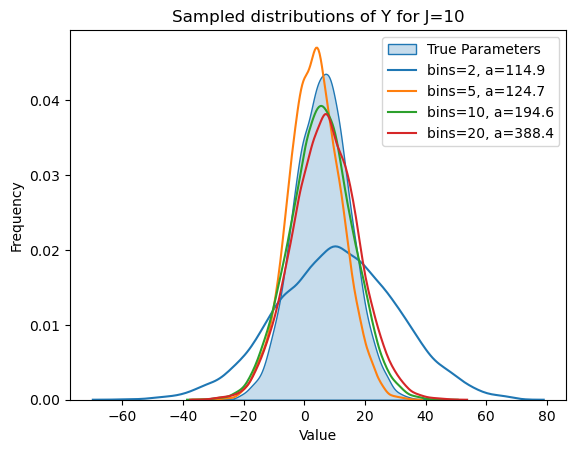

In [18]:
#for i in range(len(num_bins)):
#
#    plot_histograms(model = linear_model_blr_1_3,
#               lambd_names = lambd_names_blr_1,
#               lambd_true_vals = lambd_true_vals_blr_1,
#               best_params = best_params_blr_1_3[i],
#               alpha = alphas_blr_1_3[i],
#               J = J_3,
#               num_bins = num_bins[i],
#               partitions=blr_partitions[i],
#               lower_inner = lower_inner_blr,
#               upper_inner = upper_inner_blr)
    


plot_densities(model = linear_model_blr_1_3,
               J = J_3,
               lambd_names = lambd_names_blr_1,
               lambd_true_vals = lambd_true_vals_blr_1,
               best_params_total = best_params_blr_1_3,
               alpha_total = alphas_blr_1_3,
               num_bins = num_bins,
               lower_inner = lower_inner_blr,
               upper_inner = upper_inner_blr)

### Model 2

In [19]:
## y = β0 + β1*x1 + β2*x2 + ε, βi ~ N(μi,σi^2), ε~Ν(0,σ^2)

mu_0 = 3
sigma_0 = 1

mu_1 = 1
sigma_1 = 2

mu_2 = -2
sigma_2 = 2

sigma = 4


lambd_true_vals_blr_2 = [mu_0, sigma_0, mu_1, sigma_1, mu_2, sigma_2, sigma]
lambd_names_blr_2 = ['mu_0', 'sigma_0', 'mu_1', 'sigma_1', 'mu_2', 'sigma_2', 'sigma']

alpha = None
param_bounds_blr_2 = [[-10., 10.], [0.001, 10.], [-10., 10.], [0.001, 10.], [-10., 10.], [0.001, 10.], [0.001, 10.]] ## bounds for each hyperparameter

target_type = "continuous"
target_samples = 1500

#### J=2

In [20]:
covs_blr_2_1 = np.array([[1., 0., 1.],
                       [1., 3., -2.]]) ## 1st column is the intercept

J_1 = covs_blr_2_1.shape[0]

linear_model_blr_2_1 = lambda lambd, n_samples: linear_model_2(lambd, covs_blr_2_1, n_samples)


simulated_expert_probs_blr_2_1 = []
best_params_blr_2_1 = []
best_probs_blr_2_1 = []
alphas_blr_2_1 = []
llik_blr_2_1 = []
was_distance_blr_2_1 = []


for i in range(len(num_bins)):

    expert_probs, best_params, best_probs, alpha, llik = ppe_simulation(model = linear_model_blr_2_1,
                                                                  J = J_1,
                                                                  target_type = target_type,
                                                                  lambd_names = lambd_names_blr_2,
                                                                  lambd_true_vals = lambd_true_vals_blr_2,
                                                                  alpha = None,
                                                                  num_bins = num_bins[i],
                                                                  lower_inner = lower_inner_blr,
                                                                  upper_inner = upper_inner_blr,
                                                                  param_bounds = param_bounds_blr_2,
                                                                  target_samples = target_samples)
    
    print(f"Simulation {i+1} out of {len(num_bins)} finished.")
    
    simulated_expert_probs_blr_2_1.append(expert_probs)
    best_params_blr_2_1.append(best_params)
    best_probs_blr_2_1.append(best_probs)
    alphas_blr_2_1.append(alpha)
    llik_blr_2_1.append(llik)
    was_distance_blr_2_1.append(wasserstein_metric(best_probs = best_probs, expert_probs = expert_probs, J = J_1))

Sampling: [Y_obs, b_0, b_1, b_2]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2]
[INFO 07-04 15:20:50] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:20:50] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:20:50] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:20:50] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value 

Simulation 1 out of 4 finished.


[INFO 07-04 15:22:20] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:22:20] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:22:20] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:22:20] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter 

Simulation 2 out of 4 finished.


[INFO 07-04 15:23:54] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:23:54] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:23:54] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:23:54] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter 

Simulation 3 out of 4 finished.


[INFO 07-04 15:25:38] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:25:38] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:25:38] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:25:38] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter 

Simulation 4 out of 4 finished.


In [70]:
print("Best parameters from PPE:", best_params_blr_2_1)
print("Resulting alpha:", alphas_blr_2_1)
print("Negative dirichlet log likelihood:", llik_blr_2_1)
print("Wasserstein distance between simulated expert probabilities and result prior predictive probabilities:", was_distance_blr_2_1)

Best parameters from PPE: [{'mu_0': 6.271418797077008, 'sigma_0': 7.622024095246698, 'mu_1': 3.678550618537262, 'sigma_1': 1.905138528249605, 'mu_2': -2.8453354962432984, 'sigma_2': 7.146969527069831, 'sigma': 8.543991122141762, 'alpha': 37.87055205089039}, {'mu_0': -3.367757303853038, 'sigma_0': 3.3632912180864087, 'mu_1': 5.585820937302742, 'sigma_1': 2.3430586391321206, 'mu_2': 2.0891652233624196, 'sigma_2': 1.2436293460567993, 'sigma': 1.3762801624439858}, {'mu_0': 3.5808645255295524, 'sigma_0': 0.637955931278721, 'mu_1': 0.5828163753579148, 'sigma_1': 1.9452562567181606, 'mu_2': -2.3243741478277746, 'sigma_2': 0.7318152984003143, 'sigma': 5.192374265059046}, {'mu_0': 10.0, 'sigma_0': 2.4206881528830606, 'mu_1': -6.069610394700599, 'sigma_1': 0.001, 'mu_2': -8.94436018001817, 'sigma_2': 3.884321520297129, 'sigma': 0.7259564365602534}]
Resulting alpha: [Array(1362.0021, dtype=float32), Array(2404.6367, dtype=float32), Array(1138.142, dtype=float32), Array(2694.458, dtype=float32)]
N

Sampling: [Y_obs, b_0, b_1, b_2]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2]


Sampling: [Y_obs, b_0, b_1, b_2]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2]
Sampling: [Y_obs, b_0, b_1, b_2]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2]
Sampling: [Y_obs, b_0, b_1, b_2]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2]
Sampling: [Y_obs, b_0, b_1, b_2]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2]


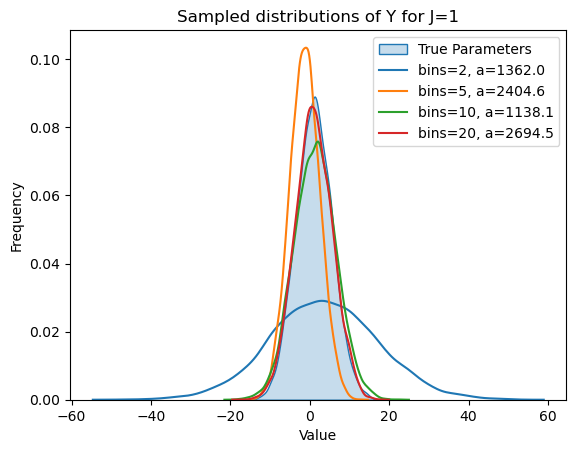

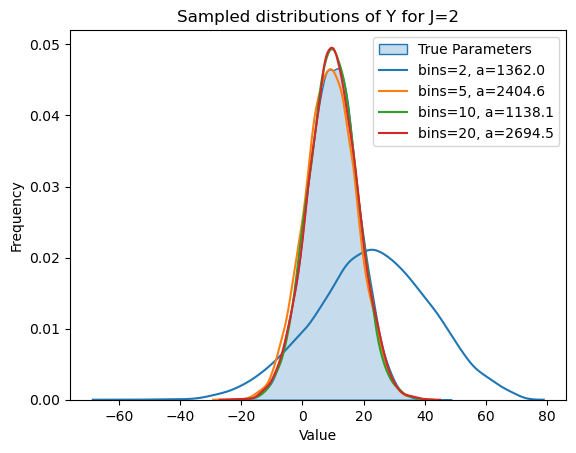

In [21]:
#for i in range(len(num_bins)):
#
#    plot_histograms#(model = linear_model_blr_2_1,
#               lambd_names = lambd_names_blr_2,
#               lambd_true_vals = lambd_true_vals_blr_2,
#               best_params = best_params_blr_2_1[i],
#               alpha = alphas_blr_2_1[i],
#               J = J_1,
#               num_bins = num_bins[i],
#               partitions=blr_partitions[i],
#               lower_inner = lower_inner_blr,
#               upper_inner = upper_inner_blr)
    
plot_densities(model = linear_model_blr_2_1,
               J = J_1,
               lambd_names = lambd_names_blr_2,
               lambd_true_vals = lambd_true_vals_blr_2,
               best_params_total = best_params_blr_2_1,
               alpha_total = alphas_blr_2_1,
               num_bins = num_bins,
               lower_inner = lower_inner_blr,
               upper_inner = upper_inner_blr)

#### J=5

In [22]:
covs_blr_2_2 = np.array([[1., 0., 1.],
                         [1., 3., -2.],
                         [1., -1, 2.],
                         [1., 2., 3.],
                         [1., 0.5, -1.]]) ## 1st column is the intercept

J_2 = covs_blr_2_2.shape[0]

linear_model_blr_2_2 = lambda lambd, n_samples: linear_model_2(lambd, covs_blr_2_2, n_samples)


simulated_expert_probs_blr_2_2 = []
best_params_blr_2_2 = []
best_probs_blr_2_2 = []
alphas_blr_2_2 = []
llik_blr_2_2 = []
was_distance_blr_2_2 = []


for i in range(len(num_bins)):

    expert_probs, best_params, best_probs, alpha, llik = ppe_simulation(model = linear_model_blr_2_2,
                                                                  J = J_2,
                                                                  target_type = target_type,
                                                                  lambd_names = lambd_names_blr_2,
                                                                  lambd_true_vals = lambd_true_vals_blr_2,
                                                                  alpha = None,
                                                                  num_bins = num_bins[i],
                                                                  lower_inner = lower_inner_blr,
                                                                  upper_inner = upper_inner_blr,
                                                                  param_bounds = param_bounds_blr_2,
                                                                  target_samples = target_samples)
    
    print(f"Simulation {i+1} out of {len(num_bins)} finished.")
    
    simulated_expert_probs_blr_2_2.append(expert_probs)
    best_params_blr_2_2.append(best_params)
    best_probs_blr_2_2.append(best_probs)
    alphas_blr_2_2.append(alpha)
    llik_blr_2_2.append(llik)
    was_distance_blr_2_2.append(wasserstein_metric(best_probs = best_probs, expert_probs = expert_probs, J = J_2))
    

Sampling: [Y_obs, b_0, b_1, b_2]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2]
[INFO 07-04 15:27:29] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:27:29] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:27:29] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:27:29] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value 

Simulation 1 out of 4 finished.


[INFO 07-04 15:29:00] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:29:00] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:29:00] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:29:00] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter 

Simulation 2 out of 4 finished.


[INFO 07-04 15:30:24] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:30:24] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:30:24] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:30:24] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter 

Simulation 3 out of 4 finished.


[INFO 07-04 15:32:26] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:32:26] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:32:26] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:32:26] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter 

Simulation 4 out of 4 finished.


In [71]:
print("Best parameters from PPE:", best_params_blr_2_2)
print("Resulting alpha:", alphas_blr_2_2)
print("Negative dirichlet log likelihood:", llik_blr_2_2)
print("Wasserstein distance between simulated expert probabilities and result prior predictive probabilities:", was_distance_blr_2_2)

Best parameters from PPE: [{'mu_0': 9.252916518541639, 'sigma_0': 10.0, 'mu_1': 4.4766099780834345, 'sigma_1': 7.716452832439401, 'mu_2': -6.459154319702815, 'sigma_2': 8.506311043260446, 'sigma': 5.373516782875391}, {'mu_0': 5.753738469310207, 'sigma_0': 1.1908264479455744, 'mu_1': -0.29147942183342046, 'sigma_1': 1.6059680439714648, 'mu_2': -4.217021709144387, 'sigma_2': 0.001, 'sigma': 4.15225760413583}, {'mu_0': 2.9401699749431582, 'sigma_0': 5.131504745039194, 'mu_1': 1.0480196565401805, 'sigma_1': 2.1410373820789195, 'mu_2': -1.9079543517000488, 'sigma_2': 1.5923473031097755, 'sigma': 0.001}, {'mu_0': 2.7909404839463647, 'sigma_0': 0.45558360762634165, 'mu_1': 1.0339726027054184, 'sigma_1': 1.8509051954318274, 'mu_2': -1.949178024905473, 'sigma_2': 2.4406121376984617, 'sigma': 3.992063295110317}]
Resulting alpha: [Array(828.82245, dtype=float32), Array(1247.0774, dtype=float32), Array(675.19055, dtype=float32), Array(2074.2402, dtype=float32)]
Negative dirichlet log likelihood: [

Sampling: [Y_obs, b_0, b_1, b_2]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2]
Sampling: [Y_obs, b_0, b_1, b_2]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2]
Sampling: [Y_obs, b_0, b_1, b_2]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2]
Sampling: [Y_obs, b_0, b_1, b_2]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2]
Sampling: [Y_obs, b_0, b_1, b_2]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2]


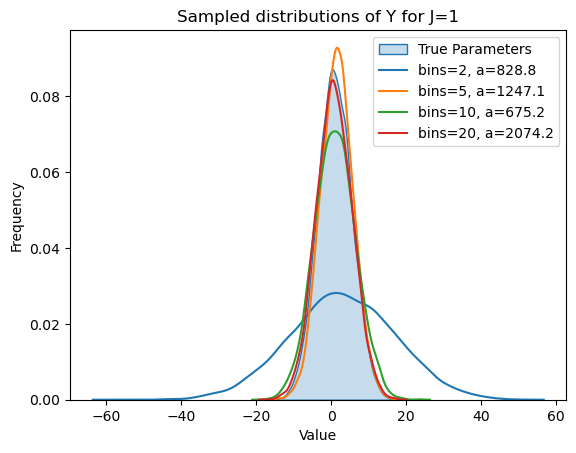

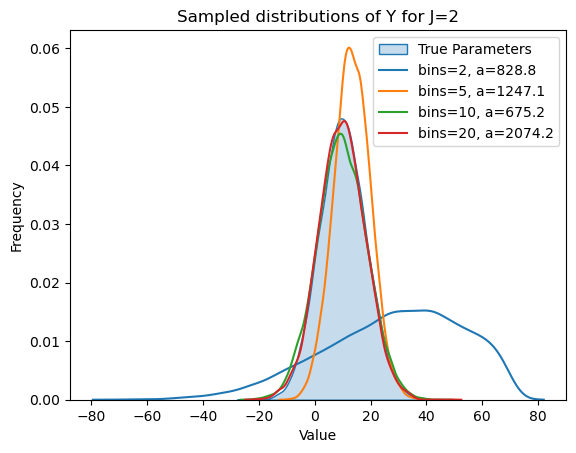

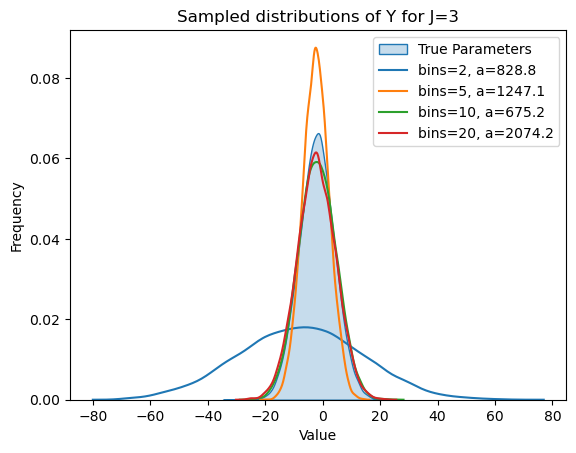

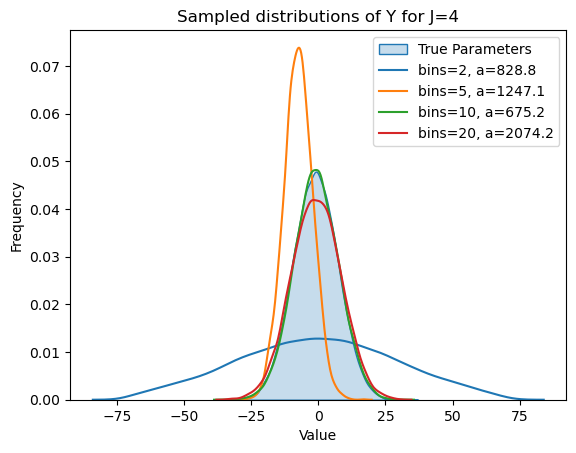

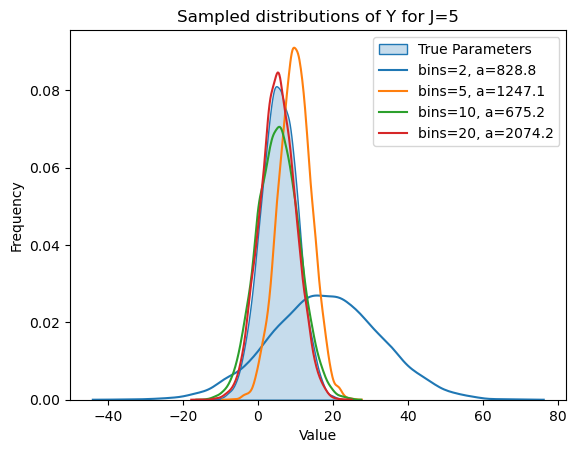

In [23]:
#for i in range(len(num_bins)):
#
#    plot_histograms(model = linear_model_blr_2_2,
#               lambd_names = lambd_names_blr_2,
#               lambd_true_vals = lambd_true_vals_blr_2,
#               best_params = best_params_blr_2_2[i],
#               alpha = alphas_blr_2_2[i],
#               J = J_2,
#               num_bins = num_bins[i],
#               partitions=blr_partitions[i],
#               lower_inner = lower_inner_blr,
#               upper_inner = upper_inner_blr)

plot_densities(model = linear_model_blr_2_2,
               J = J_2,
               lambd_names = lambd_names_blr_2,
               lambd_true_vals = lambd_true_vals_blr_2,
               best_params_total = best_params_blr_2_2,
               alpha_total = alphas_blr_2_2,
               num_bins = num_bins,
               lower_inner = lower_inner_blr,
               upper_inner = upper_inner_blr)

#### J=10

In [24]:
covs_blr_2_3 = np.array([[1., 0., 1.],
                         [1., 3., -2.],
                         [1., -1, 2.],
                         [1., 2., 3.],
                         [1., 0.5, -1.],
                         [1., -4, -1.],
                         [1., 2, -3.],
                         [1., 1, 1.],
                         [1., 0, 5.],
                         [1., 5, 0.]]) ## 1st column is the intercept

J_3 = covs_blr_2_3.shape[0]

linear_model_blr_2_3 = lambda lambd, n_samples: linear_model_2(lambd, covs_blr_2_3, n_samples)


simulated_expert_probs_blr_2_3 = []
best_params_blr_2_3 = []
best_probs_blr_2_3 = []
alphas_blr_2_3 = []
llik_blr_2_3 = []
was_distance_blr_2_3 = []

for i in range(len(num_bins)):

    expert_probs, best_params, best_probs, alpha, llik = ppe_simulation(model = linear_model_blr_2_3,
                                                                  J = J_3,
                                                                  target_type = target_type,
                                                                  lambd_names = lambd_names_blr_2,
                                                                  lambd_true_vals = lambd_true_vals_blr_2,
                                                                  alpha = None,
                                                                  num_bins = num_bins[i],
                                                                  lower_inner = lower_inner_blr,
                                                                  upper_inner = upper_inner_blr,
                                                                  param_bounds = param_bounds_blr_2,
                                                                  target_samples = target_samples)
    
    print(f"Simulation {i+1} out of {len(num_bins)} finished.")
    
    simulated_expert_probs_blr_2_3.append(expert_probs)
    best_params_blr_2_3.append(best_params)
    best_probs_blr_2_3.append(best_probs)
    alphas_blr_2_3.append(alpha)
    llik_blr_2_3.append(llik)
    was_distance_blr_2_3.append(wasserstein_metric(best_probs = best_probs, expert_probs = expert_probs, J = J_3))
    

Sampling: [Y_obs, b_0, b_1, b_2]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2]
[INFO 07-04 15:34:21] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:34:21] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:34:21] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:34:21] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value 

Simulation 1 out of 4 finished.


[INFO 07-04 15:35:41] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:35:41] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:35:41] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:35:41] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter 

Simulation 2 out of 4 finished.


[INFO 07-04 15:37:14] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:37:14] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:37:14] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:37:14] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter 

Simulation 3 out of 4 finished.


[INFO 07-04 15:38:59] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:38:59] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:38:59] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:38:59] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter 

Simulation 4 out of 4 finished.


In [72]:
print("Best parameters from PPE:", best_params_blr_2_3)
print("Resulting alpha:", alphas_blr_2_3)
print("Negative dirichlet log likelihood:", llik_blr_2_3)
print("Wasserstein distance between simulated expert probabilities and result prior predictive probabilities:", was_distance_blr_2_3)

Best parameters from PPE: [{'mu_0': 10.0, 'sigma_0': 10.0, 'mu_1': 3.3189954841057556, 'sigma_1': 6.338882670434975, 'mu_2': -7.182225368066775, 'sigma_2': 8.760987879859815, 'sigma': 2.9182331422246595}, {'mu_0': 2.879921079424486, 'sigma_0': 3.7141016167585974, 'mu_1': 0.04901222868764066, 'sigma_1': 1.167997501071254, 'mu_2': -1.3362846490548304, 'sigma_2': 2.06239068632318, 'sigma': 5.464413466339172}, {'mu_0': 2.988844187699108, 'sigma_0': 5.349489899889808, 'mu_1': 1.0368033951810318, 'sigma_1': 1.879546737473989, 'mu_2': -1.927463152283341, 'sigma_2': 2.2113670169811277, 'sigma': 1.6898854434303634}, {'mu_0': 3.3538288826980693, 'sigma_0': 3.6965657192765664, 'mu_1': 1.1006166563204225, 'sigma_1': 2.165658684001355, 'mu_2': -2.152137537546249, 'sigma_2': 2.436232366575762, 'sigma': 0.8363433850744978}]
Resulting alpha: [Array(265.20782, dtype=float32), Array(201.56073, dtype=float32), Array(341.1503, dtype=float32), Array(750.7804, dtype=float32)]
Negative dirichlet log likeliho

Sampling: [Y_obs, b_0, b_1, b_2]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2]


Sampling: [Y_obs, b_0, b_1, b_2]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2]
Sampling: [Y_obs, b_0, b_1, b_2]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2]
Sampling: [Y_obs, b_0, b_1, b_2]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2]
Sampling: [Y_obs, b_0, b_1, b_2]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2]


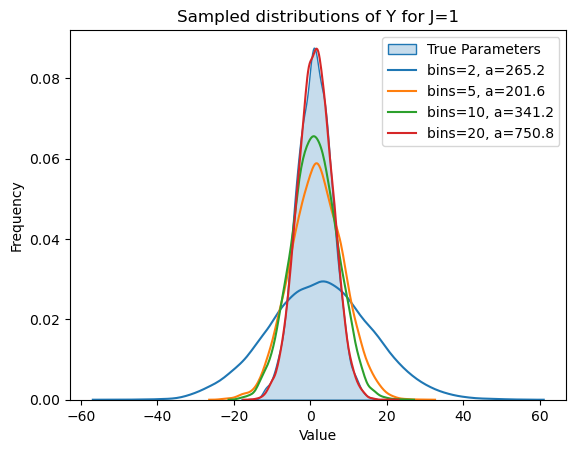

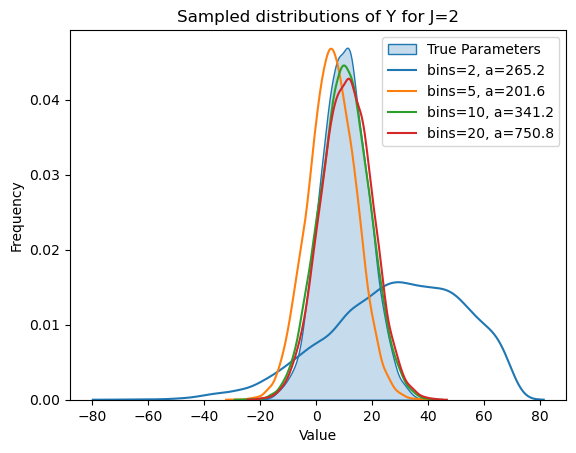

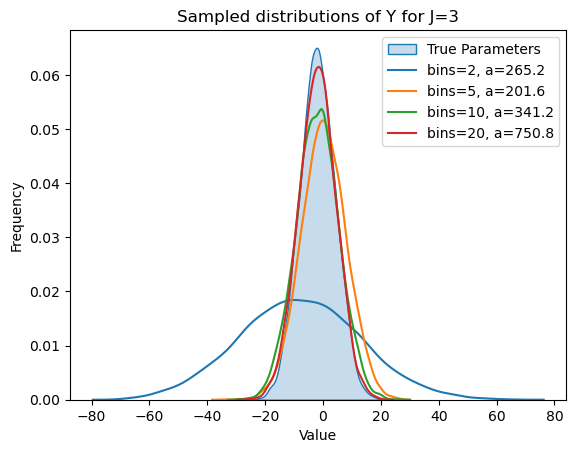

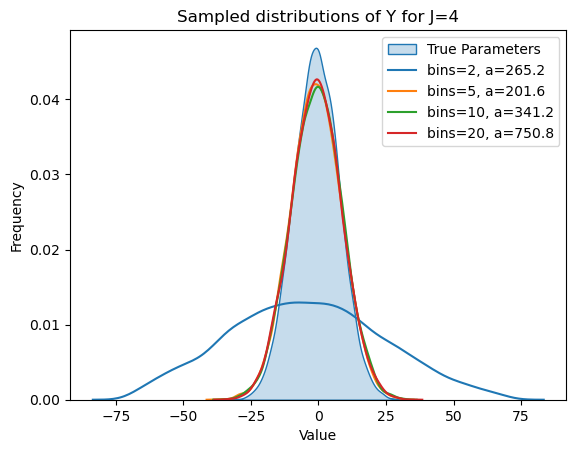

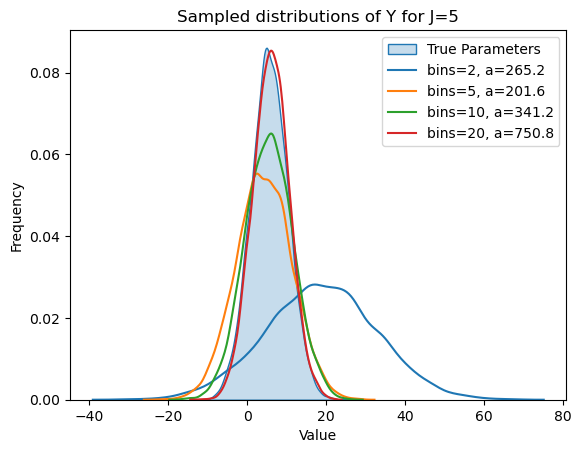

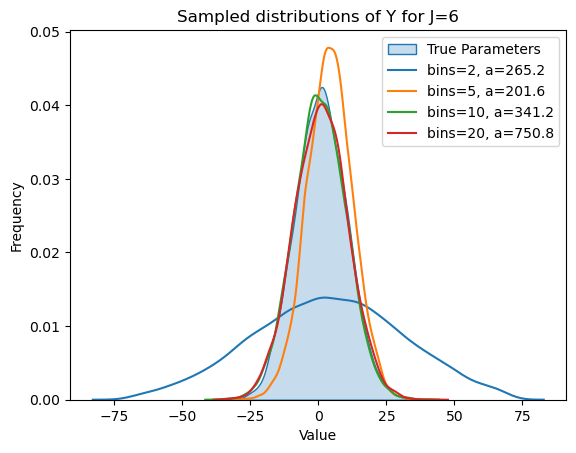

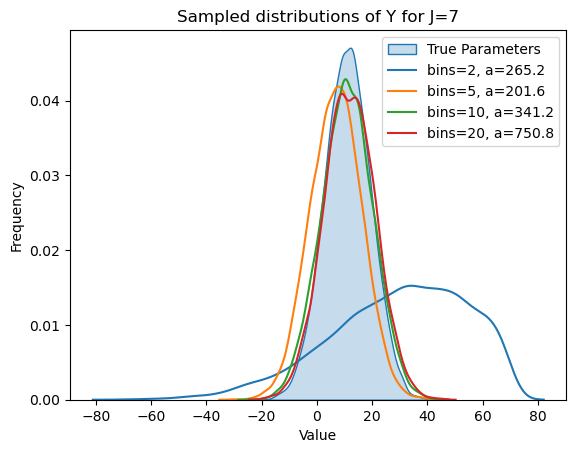

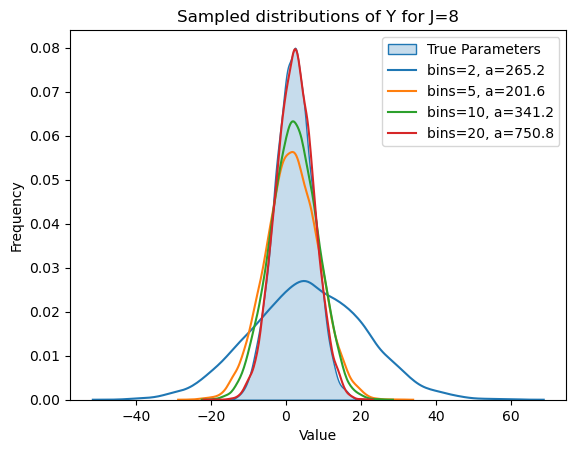

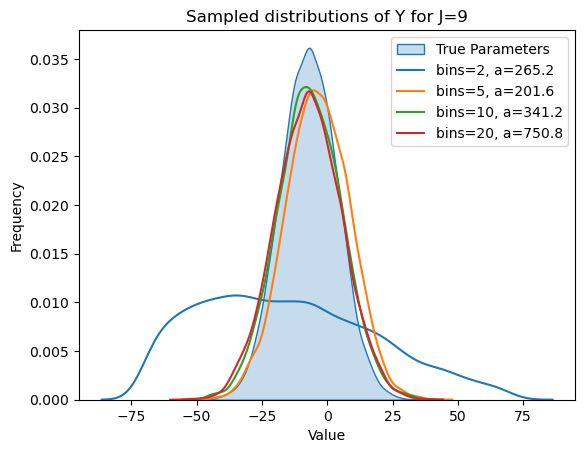

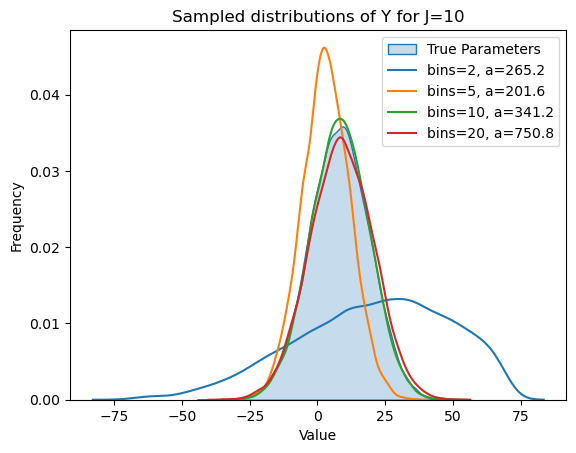

In [25]:
#for i in range(len(num_bins)):
#
#    plot_histograms(model = linear_model_blr_2_3,
#               lambd_names = lambd_names_blr_2,
#               lambd_true_vals = lambd_true_vals_blr_2,
#               best_params = best_params_blr_2_3[i],
#               alpha = alphas_blr_2_3[i],
#               J = J_3,
#               num_bins = num_bins[i],
#               partitions=blr_partitions[i],
#               lower_inner = lower_inner_blr,
#               upper_inner = upper_inner_blr)
    
plot_densities(model = linear_model_blr_2_3,
               J = J_3,
               lambd_names = lambd_names_blr_2,
               lambd_true_vals = lambd_true_vals_blr_2,
               best_params_total = best_params_blr_2_3,
               alpha_total = alphas_blr_2_3,
               num_bins = num_bins,
               lower_inner = lower_inner_blr,
               upper_inner = upper_inner_blr)

### Model 3

In [55]:
## y = β0 + β1*x1 + β2*x2 + β3*x3 + β4*x4 + ε, βi ~ N(μi,σi^2), ε~Ν(0,σ^2)

mu_0 = 3
sigma_0 = 1

mu_1 = 1
sigma_1 = 2

mu_2 = -2
sigma_2 = 2

mu_3 = 3
sigma_3 = 2

mu_4 = -3
sigma_4 = 2

sigma = 4


lambd_true_vals_blr_3 = [mu_0, sigma_0, mu_1, sigma_1, mu_2, sigma_2, mu_3, sigma_3, mu_4, sigma_4, sigma]
lambd_names_blr_3 = ['mu_0', 'sigma_0', 'mu_1', 'sigma_1', 'mu_2', 'sigma_2', 'mu_3', 'sigma_3', 'mu_4', 'sigma_4', 'sigma']

alpha = None
param_bounds_blr_3 = [[-10., 10.], [0.001, 10.],
                      [-10., 10.], [0.001, 10.],
                      [-10., 10.], [0.001, 10.],
                      [-10., 10.], [0.001, 10.],
                      [-10., 10.], [0.001, 10.],
                      [0.001, 10.]] ## bounds for each hyperparameter

target_type = "continuous"
target_samples = 1500

In [56]:
covs_blr_3_1 = np.array([[1., 0., 1., 2., -1],
                       [1., 3., -2., 2., -2.]]) ## 1st column is the intercept

J_1 = covs_blr_3_1.shape[0]

linear_model_blr_3_1 = lambda lambd, n_samples: linear_model_3(lambd, covs_blr_3_1, n_samples)


simulated_expert_probs_blr_3_1 = []
best_params_blr_3_1 = []
best_probs_blr_3_1 = []
alphas_blr_3_1 = []
llik_blr_3_1 = []
was_distance_blr_3_1 = []


for i in range(len(num_bins)):

    expert_probs, best_params, best_probs, alpha, llik = ppe_simulation(model = linear_model_blr_3_1,
                                                                  J = J_1,
                                                                  target_type = target_type,
                                                                  lambd_names = lambd_names_blr_3,
                                                                  lambd_true_vals = lambd_true_vals_blr_3,
                                                                  alpha = None,
                                                                  num_bins = num_bins[i],
                                                                  lower_inner = lower_inner_blr,
                                                                  upper_inner = upper_inner_blr,
                                                                  param_bounds = param_bounds_blr_3,
                                                                  target_samples = target_samples)
    
    print(f"Simulation {i+1} out of {len(num_bins)} finished.")
    
    simulated_expert_probs_blr_3_1.append(expert_probs)
    best_params_blr_3_1.append(best_params)
    best_probs_blr_3_1.append(best_probs)
    alphas_blr_3_1.append(alpha)
    llik_blr_3_1.append(llik)
    was_distance_blr_3_1.append(wasserstein_metric(best_probs = best_probs, expert_probs = expert_probs, J = J_1))

Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]
[INFO 07-04 16:10:20] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:10:20] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:10:20] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:10:20] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not

Simulation 1 out of 4 finished.


[INFO 07-04 16:11:34] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:11:34] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:11:34] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:11:34] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter 

Simulation 2 out of 4 finished.


[INFO 07-04 16:12:55] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:12:55] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:12:55] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:12:55] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter 

Simulation 3 out of 4 finished.


[INFO 07-04 16:14:24] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:14:24] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:14:24] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:14:24] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter 

Simulation 4 out of 4 finished.


In [73]:
print("Best parameters from PPE:", best_params_blr_3_1)
print("Resulting alpha:", alphas_blr_3_1)
print("Negative dirichlet log likelihood:", llik_blr_3_1)
print("Wasserstein distance between simulated expert probabilities and result prior predictive probabilities:", was_distance_blr_3_1)

Best parameters from PPE: [{'mu_0': 1.878501820149566, 'sigma_0': 8.92908354758558, 'mu_1': 0.48473907146163064, 'sigma_1': 4.200285541858091, 'mu_2': -3.5504082360354374, 'sigma_2': 5.346568716998752, 'mu_3': 10.0, 'sigma_3': 7.509309183262185, 'mu_4': -7.679764354047883, 'sigma_4': 4.116349167919198, 'sigma': 3.0658422318143987, 'alpha': 22.99789199308021}, {'mu_0': -3.6744851916020167, 'sigma_0': 4.350364187410499, 'mu_1': 5.222501654577929, 'sigma_1': 1.7204872678968979, 'mu_2': 0.7651206206705847, 'sigma_2': 0.8238508180352735, 'mu_3': 3.8577206661380607, 'sigma_3': 1.0642330739218868, 'mu_4': -2.122503226664877, 'sigma_4': 6.879497608385185, 'sigma': 4.813458753653868}, {'mu_0': -3.8308161088608417, 'sigma_0': 6.890991026419531, 'mu_1': -4.6334760396405406, 'sigma_1': 0.26841072965565355, 'mu_2': -7.02371166126248, 'sigma_2': 4.319969113643163, 'mu_3': 6.965950722206809, 'sigma_3': 0.20081271354910116, 'mu_4': -5.653749817436174, 'sigma_4': 4.167280537276217, 'sigma': 0.857118068

Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]
Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]
Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]
Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]
Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]


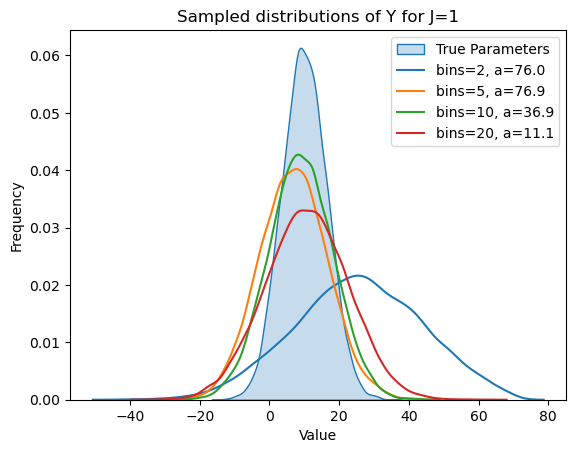

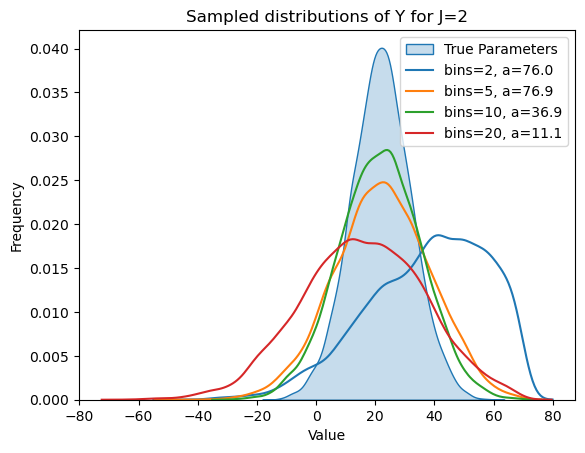

In [57]:
#for i in range(len(num_bins)):
#
#    plot_histograms(model = linear_model_blr_3_1,
#               lambd_names = lambd_names_blr_3,
#               lambd_true_vals = lambd_true_vals_blr_3,
#               best_params = best_params_blr_3_1[i],
#               alpha = alphas_blr_3_1[i],
#               J = J_1,
#               num_bins = num_bins[i],
#               partitions=blr_partitions[i],
#               lower_inner = lower_inner_blr,
#               upper_inner = upper_inner_blr)
    
plot_densities(model = linear_model_blr_3_1,
               J = J_1,
               lambd_names = lambd_names_blr_3,
               lambd_true_vals = lambd_true_vals_blr_3,
               best_params_total = best_params_blr_3_1,
               alpha_total = alphas_blr_3_1,
               num_bins = num_bins,
               lower_inner = lower_inner_blr,
               upper_inner = upper_inner_blr)

#### J=5

In [58]:
covs_blr_3_2 = np.array([[1., 0., 1., 2., -1],
                         [1., 3., -2., 2., -2.],
                         [1., 1., 0., 1., -2.],
                         [1., -1., 3., 2., -1.],
                         [1., -3, -1., 0., 1.]]) ## 1st column is the intercept

J_2 = covs_blr_3_2.shape[0]

linear_model_blr_3_2 = lambda lambd, n_samples: linear_model_3(lambd, covs_blr_3_2, n_samples)


simulated_expert_probs_blr_3_2 = []
best_params_blr_3_2 = []
best_probs_blr_3_2 = []
alphas_blr_3_2 = []
llik_blr_3_2 = []
was_distance_blr_3_2 = []


for i in range(len(num_bins)):

    expert_probs, best_params, best_probs, alpha, llik = ppe_simulation(model = linear_model_blr_3_2,
                                                                  J = J_2,
                                                                  target_type = target_type,
                                                                  lambd_names = lambd_names_blr_3,
                                                                  lambd_true_vals = lambd_true_vals_blr_3,
                                                                  alpha = None,
                                                                  num_bins = num_bins[i],
                                                                  lower_inner = lower_inner_blr,
                                                                  upper_inner = upper_inner_blr,
                                                                  param_bounds = param_bounds_blr_3,
                                                                  target_samples = target_samples)
    
    print(f"Simulation {i+1} out of {len(num_bins)} finished.")
    
    simulated_expert_probs_blr_3_2.append(expert_probs)
    best_params_blr_3_2.append(best_params)
    best_probs_blr_3_2.append(best_probs)
    alphas_blr_3_2.append(alpha)
    llik_blr_3_2.append(llik)
    was_distance_blr_3_2.append(wasserstein_metric(best_probs = best_probs, expert_probs = expert_probs, J = J_2))
    

Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]
[INFO 07-04 16:15:47] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:15:47] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:15:47] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:15:47] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not

Simulation 1 out of 4 finished.


[INFO 07-04 16:17:11] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:17:11] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:17:11] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:17:11] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter 

Simulation 2 out of 4 finished.


[INFO 07-04 16:18:31] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:18:31] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:18:31] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:18:31] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter 

Simulation 3 out of 4 finished.


[INFO 07-04 16:19:50] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:19:50] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:19:50] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:19:50] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter 

Simulation 4 out of 4 finished.


In [76]:
print("Best parameters from PPE:", best_params_blr_3_2)
print("Resulting alpha:", alphas_blr_3_2)
print("Negative dirichlet log likelihood:", llik_blr_3_2)
print("Wasserstein distance between simulated expert probabilities and result prior predictive probabilities:", was_distance_blr_3_2)

Best parameters from PPE: [{'mu_0': 6.692929669917227, 'sigma_0': 0.001, 'mu_1': 2.9440747424682634, 'sigma_1': 5.342242996171266, 'mu_2': -3.2515392555839835, 'sigma_2': 4.061486893789375, 'mu_3': 6.645534091836897, 'sigma_3': 7.736333376476897, 'mu_4': -4.708084994709263, 'sigma_4': 6.210814534761314, 'sigma': 6.339453102042141}, {'mu_0': 8.556670211943022, 'sigma_0': 6.451656600989757, 'mu_1': 1.3907525130906357, 'sigma_1': 1.112497913820465, 'mu_2': -1.1119559908059582, 'sigma_2': 0.38433233151848367, 'mu_3': -3.5673996248917845, 'sigma_3': 2.6881760063731592, 'mu_4': -5.1475218922597445, 'sigma_4': 7.197318587174169, 'sigma': 4.355474306593197}, {'mu_0': 4.443643033687108, 'sigma_0': 3.795393423155639, 'mu_1': 3.31226803497108, 'sigma_1': 4.23237784105622, 'mu_2': -0.9462502398418398, 'sigma_2': 5.805429669673721, 'mu_3': 6.352672046722002, 'sigma_3': 6.517286820388892, 'mu_4': 3.045635000608904, 'sigma_4': 7.727148678696696, 'sigma': 9.551734207134494}, {'mu_0': 2.089193014643271

Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]


Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]
Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]
Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]
Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]


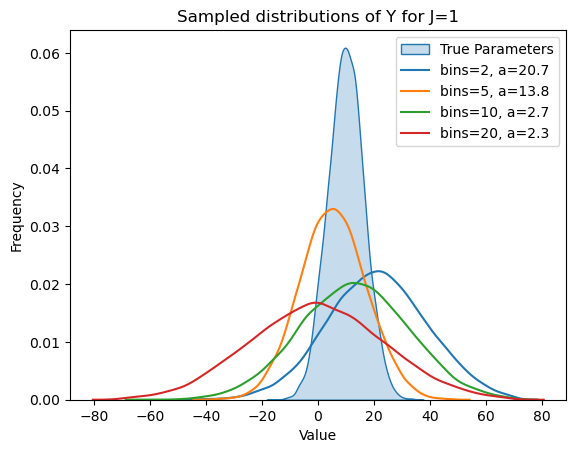

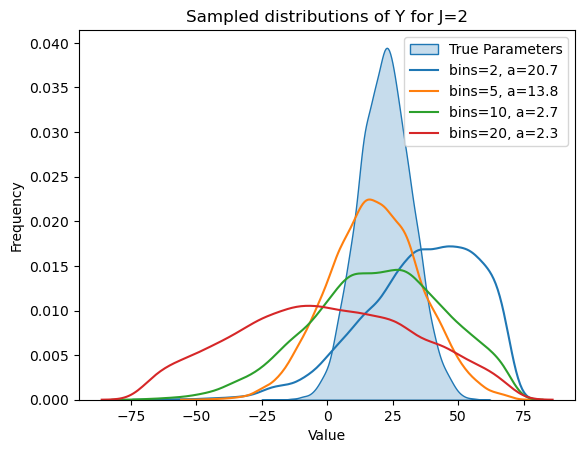

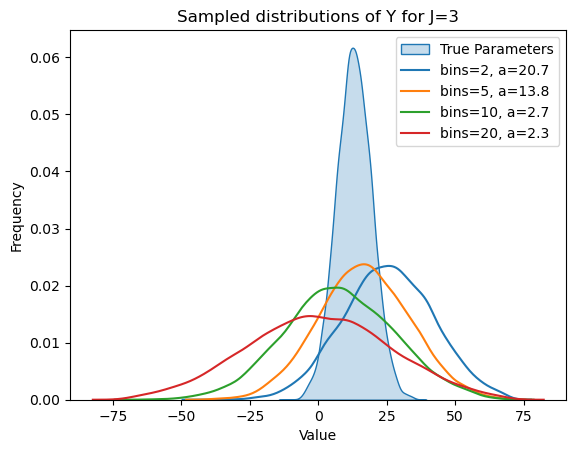

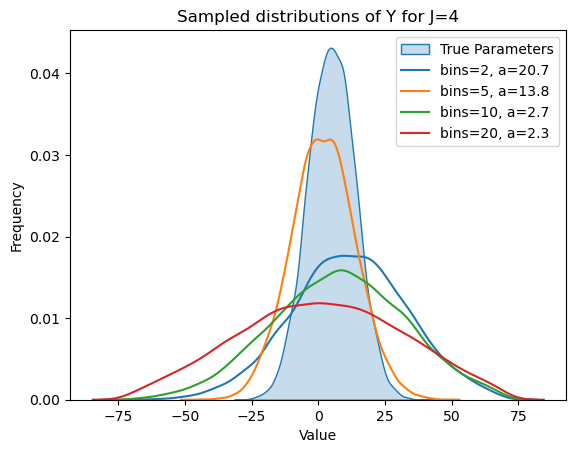

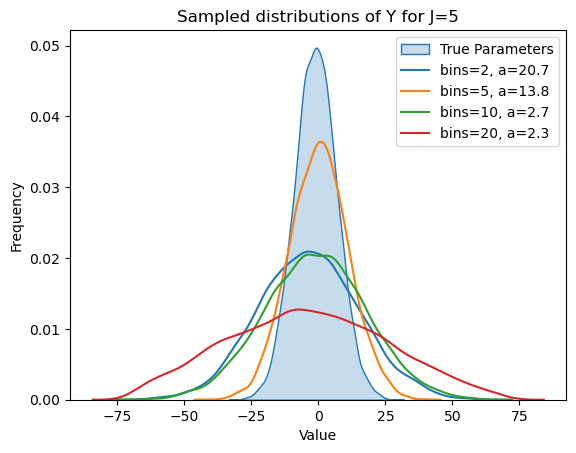

In [59]:
#for i in range(len(num_bins)):
#
#    plot_histograms(model = linear_model_blr_3_2,
#               lambd_names = lambd_names_blr_3,
#               lambd_true_vals = lambd_true_vals_blr_3,
#               best_params = best_params_blr_3_2[i],
#               alpha = alphas_blr_3_2[i],
#               J = J_2,
#               num_bins = num_bins[i],
#               partitions=blr_partitions[i],
#               lower_inner = lower_inner_blr,
#               upper_inner = upper_inner_blr)
    
plot_densities(model = linear_model_blr_3_2,
               J = J_2,
               lambd_names = lambd_names_blr_3,
               lambd_true_vals = lambd_true_vals_blr_3,
               best_params_total = best_params_blr_3_2,
               alpha_total = alphas_blr_3_2,
               num_bins = num_bins,
               lower_inner = lower_inner_blr,
               upper_inner = upper_inner_blr)

#### J=10

In [60]:
covs_blr_3_3 = np.array([[1., 0., 1., 2., -1],
                         [1., 3., -2., 2., -2.],
                         [1., 1., 0., 1., -2.],
                         [1., -1., 3., 2., -1.],
                         [1., -3, -1., 0., 1.],
                         [1., 4., 1., 2., 0.],
                         [1., 0., 2., 2., -1.],
                         [1., 1., -3., -1., -1.],
                         [1., -1, 0., 4., 3.],
                         [1., -2, 3., 1., 1.]]) ## 1st column is the intercept

J_3 = covs_blr_3_3.shape[0]

linear_model_blr_3_3 = lambda lambd, n_samples: linear_model_3(lambd, covs_blr_3_3, n_samples)


simulated_expert_probs_blr_3_3 = []
best_params_blr_3_3 = []
best_probs_blr_3_3 = []
alphas_blr_3_3 = []
llik_blr_3_3 = []
was_distance_blr_3_3 = []

for i in range(len(num_bins)):

    expert_probs, best_params, best_probs, alpha, llik = ppe_simulation(model = linear_model_blr_3_3,
                                                                  J = J_3,
                                                                  target_type = target_type,
                                                                  lambd_names = lambd_names_blr_3,
                                                                  lambd_true_vals = lambd_true_vals_blr_3,
                                                                  alpha = None,
                                                                  num_bins = num_bins[i],
                                                                  lower_inner = lower_inner_blr,
                                                                  upper_inner = upper_inner_blr,
                                                                  param_bounds = param_bounds_blr_3,
                                                                  target_samples = target_samples)
    
    print(f"Simulation {i+1} out of {len(num_bins)} finished.")
    
    simulated_expert_probs_blr_3_3.append(expert_probs)
    best_params_blr_3_3.append(best_params)
    best_probs_blr_3_3.append(best_probs)
    alphas_blr_3_3.append(alpha)
    llik_blr_3_3.append(llik)
    was_distance_blr_3_3.append(wasserstein_metric(best_probs = best_probs, expert_probs = expert_probs, J = J_3))
    

Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]
[INFO 07-04 16:21:18] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:21:18] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:21:18] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:21:18] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not

Simulation 1 out of 4 finished.


[INFO 07-04 16:22:33] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:22:33] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:22:33] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:22:33] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter 

Simulation 2 out of 4 finished.


[INFO 07-04 16:23:55] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:23:55] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:23:55] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:23:55] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter 

Simulation 3 out of 4 finished.


[INFO 07-04 16:25:03] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:25:03] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:25:03] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:25:03] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter 

Simulation 4 out of 4 finished.


In [75]:
print("Best parameters from PPE:", best_params_blr_3_3)
print("Resulting alpha:", alphas_blr_3_3)
print("Negative dirichlet log likelihood:", llik_blr_3_3)
print("Wasserstein distance between simulated expert probabilities and result prior predictive probabilities:", was_distance_blr_3_3)

Best parameters from PPE: [{'mu_0': 3.262959805939854, 'sigma_0': 1.6710833742841578, 'mu_1': 1.191691003161866, 'sigma_1': 7.401779223950504, 'mu_2': -3.098568370829204, 'sigma_2': 6.336933244780284, 'mu_3': 6.354371654956992, 'sigma_3': 7.668506763979542, 'mu_4': -6.333658010779496, 'sigma_4': 8.447463703658872, 'sigma': 9.045045211615342}, {'mu_0': 3.9190936668737937, 'sigma_0': 8.617374198137568, 'mu_1': 1.2590190401942642, 'sigma_1': 6.429901518052504, 'mu_2': -2.255021201859302, 'sigma_2': 9.097727417088551, 'mu_3': 1.873978994016479, 'sigma_3': 6.429122759856386, 'mu_4': -5.0024066300150425, 'sigma_4': 6.146285332218904, 'sigma': 8.4366003522705}, {'mu_0': 0.8658903076041131, 'sigma_0': 8.70408524425985, 'mu_1': -0.1361894458445292, 'sigma_1': 8.334870126085336, 'mu_2': -0.17114392916242238, 'sigma_2': 10.0, 'mu_3': 0.6358485259324791, 'sigma_3': 10.0, 'mu_4': -1.843440993802929, 'sigma_4': 10.0, 'sigma': 10.0}, {'mu_0': 2.8215207693412996, 'sigma_0': 8.865576924601033, 'mu_1': 

Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]
Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]
Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]
Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]
Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]


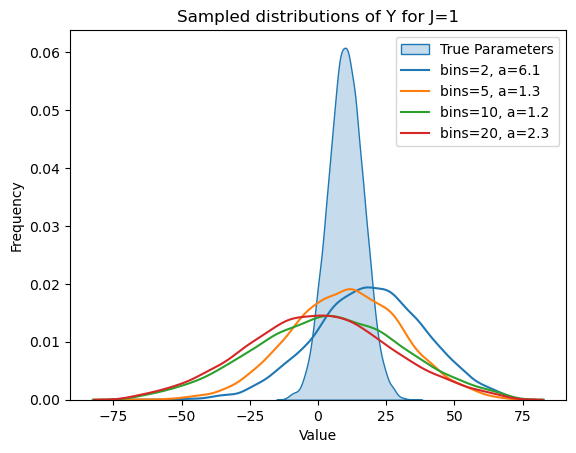

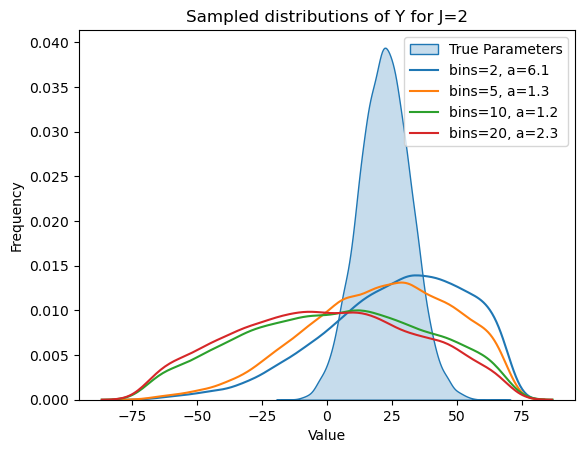

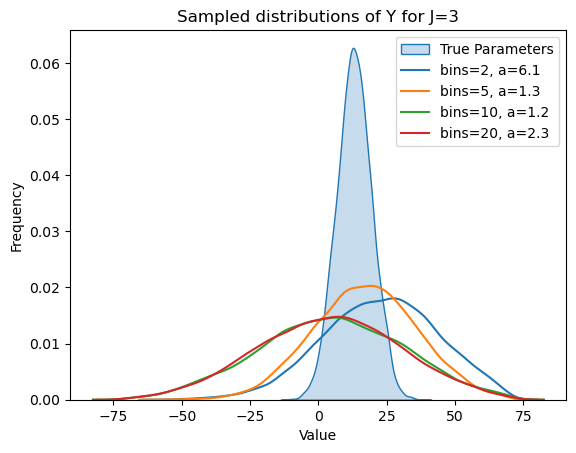

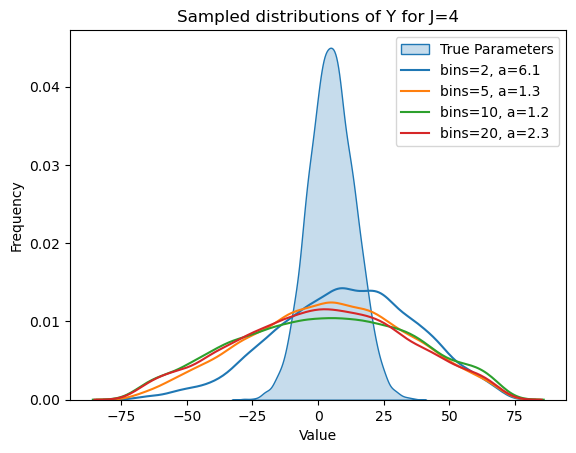

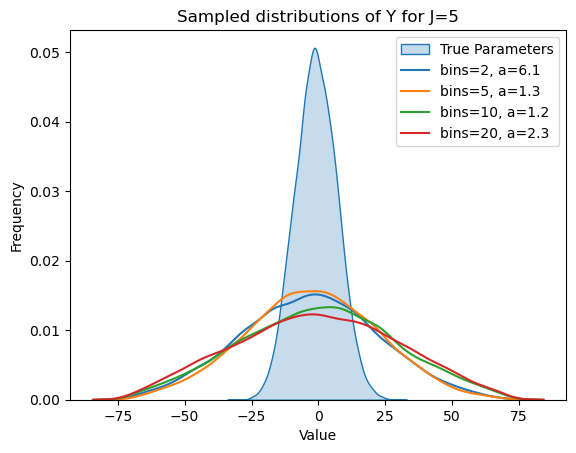

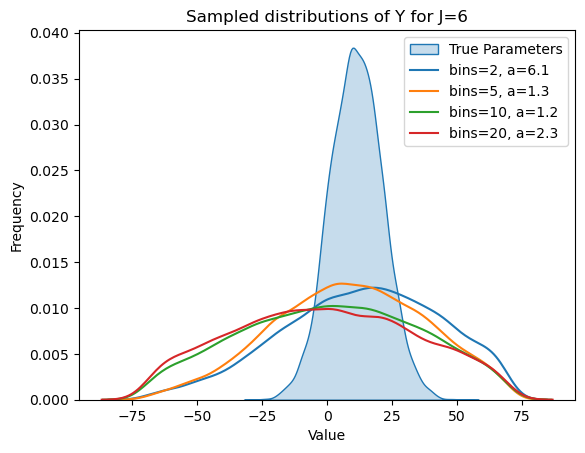

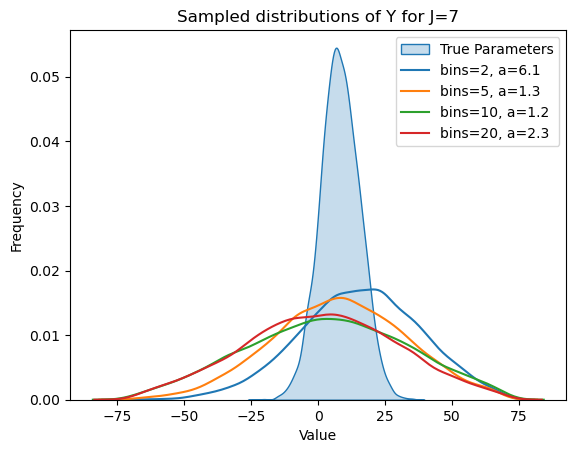

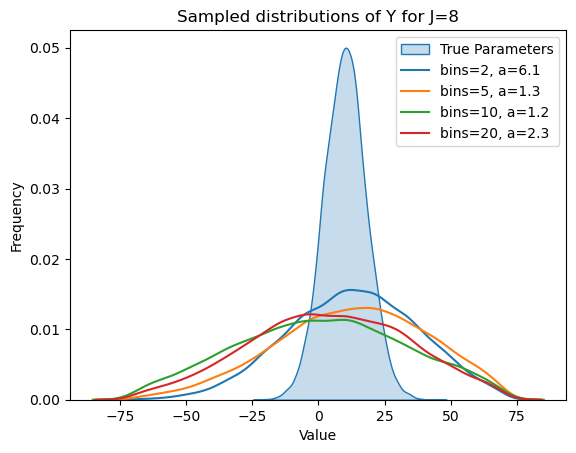

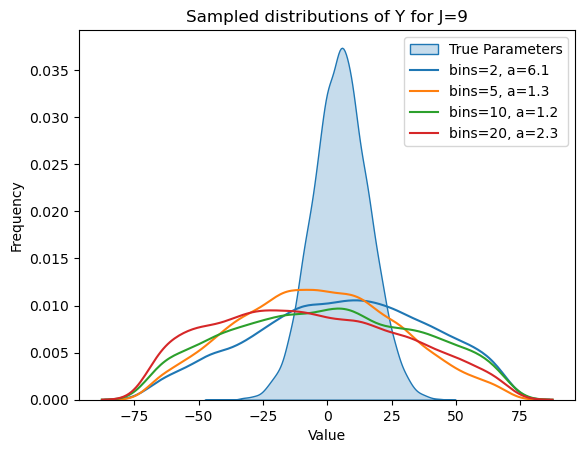

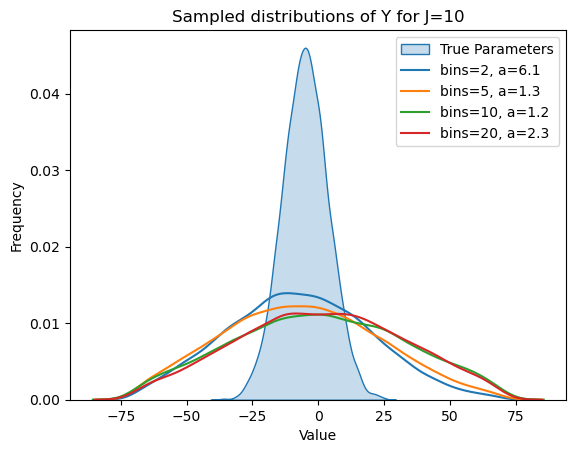

In [61]:
#for i in range(len(num_bins)):
#
#    plot_histograms(model = linear_model_blr_3_3,
#               lambd_names = lambd_names_blr_3,
#               lambd_true_vals = lambd_true_vals_blr_3,
#               best_params = best_params_blr_3_3[i],
#               alpha = alphas_blr_3_3[i],
#               J = J_3,
#               num_bins = num_bins[i],
#               partitions=blr_partitions[i],
#               lower_inner = lower_inner_blr,
#               upper_inner = upper_inner_blr)
    
plot_densities(model = linear_model_blr_3_3,
               J = J_3,
               lambd_names = lambd_names_blr_3,
               lambd_true_vals = lambd_true_vals_blr_3,
               best_params_total = best_params_blr_3_3,
               alpha_total = alphas_blr_3_3,
               num_bins = num_bins,
               lower_inner = lower_inner_blr,
               upper_inner = upper_inner_blr)

## Model Family 3: Logistic Regression


We now perform simulation for the logistic regression model with covariates x = \{$x_1,...,x_n$\}:

$$Y\sim\mathcal{B}(p(\pmb{x}, \pmb{\theta})),$$

where $p(\pmb{x}, \pmb{\theta}) = \frac{e^{\pmb{x}^{\Tau} \pmb{\theta}}}{1 + e^{\pmb{x}^{\Tau} \pmb{\theta}}}$, with $\theta_i \sim \mathcal{N}(\mu_i, \sigma_i^2)$, $i=0,...,n$.

Since $Y$ is now binary, the partitioning is fixed and constitutes of the classes $\{0\}$ and $\{1\}$. Same as with the Bayesian Linear Regression model, we consider three values for $n$, specifically $n\in{1,2,4}$, corresponding to three different probabilistic models for $Y$. The first (Model 1) has 4 hyperparameters, the second (Model 2) has 6 and the third (Model 3) has 10.

To test each of the three models, we will have different number of covariate sets $J=2, 5, 10$.


In [33]:
from logistic_models import logistic_model_1, logistic_model_2, logistic_model_3

### Model 1

In [34]:
mu_0 = 3
sigma_0 = 1

mu_1 = 1
sigma_1 = 2


lambd_true_vals_lr_1 = [mu_0, sigma_0, mu_1, sigma_1]
lambd_names_lr_1 = ['mu_0', 'sigma_0', 'mu_1', 'sigma_1']

param_bounds_lr_1 = [[-10., 10.], [0.001, 10.], [-10., 10.], [0.001, 10.]] ## bounds for each hyperparameter

target_type = "discrete"
num_classes = 2
target_samples = 1500

#### J = 2

In [35]:
covs_lr_1_1 = np.array([[1., 0.],
                       [1., 3.]]) ## 1st column is the intercept

J_1 = covs_lr_1_1.shape[0]

model_lr_1_1 = lambda lambd, n_samples: logistic_model_1(lambd, covs_lr_1_1, n_samples)


simulated_expert_probs_lr_1_1, best_params_lr_1_1, best_probs_lr_1_1, alphas_lr_1_1, llik_lr_1_1 = ppe_simulation(model = model_lr_1_1,
                                                                                                    J = J_1,
                                                                                                    target_type = target_type,
                                                                                                    lambd_names = lambd_names_lr_1,
                                                                                                    lambd_true_vals = lambd_true_vals_lr_1,
                                                                                                    alpha = None,
                                                                                                    num_bins = num_classes,
                                                                                                    lower_inner = None,
                                                                                                    upper_inner = None,
                                                                                                    param_bounds = param_bounds_lr_1,
                                                                                                    target_samples = target_samples)

was_distance_lr_1_1 = wasserstein_metric(best_probs = best_probs_lr_1_1, expert_probs = simulated_expert_probs_lr_1_1, J = J_1)

Sampling: [Y_obs, b_0, b_1]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1]
[INFO 07-04 15:57:45] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:57:45] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:57:45] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:57:45] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value type, you 

In [36]:
print("Simulated expert probabilities:", simulated_expert_probs_lr_1_1)
print("Best parameters from PPE:", best_params_lr_1_1)
print("Corresponding probabilities from PPE:", best_probs_lr_1_1)
print("Resulting alpha:", alphas_lr_1_1)
print("Negative dirichlet log likelihood:", llik_lr_1_1)
print("Wasserstein distance between simulated expert probabilities and result prior predictive probabilities:", was_distance_lr_1_1)

Simulated expert probabilities: [array([0.06665, 0.93335]), array([0.17395, 0.82605])]
Best parameters from PPE: {'mu_0': 2.9387699708300232, 'sigma_0': 9.334579252270085, 'mu_1': 7.797602173591802, 'sigma_1': 9.815445183087007, 'alpha': 70.0}
Corresponding probabilities from PPE: [array([0.0734, 0.9266]), array([0.1841, 0.8159])]
Resulting alpha: 486.5755
Negative dirichlet log likelihood: -4.756072044372559
Wasserstein distance between simulated expert probabilities and result prior predictive probabilities: 0.011950104602052675


#### J=5

In [37]:
covs_lr_1_2 = np.array([[1., -2.],
                         [1., 1.],
                         [1., 0.],
                         [1., 1.],
                         [1., 2.]]) ## 1st column is the intercept

J_2 = covs_lr_1_2.shape[0]

model_lr_1_2 = lambda lambd, n_samples: logistic_model_1(lambd, covs_lr_1_2, n_samples)


simulated_expert_probs_lr_1_2, best_params_lr_1_2, best_probs_lr_1_2, alphas_lr_1_2, llik_lr_1_2 = ppe_simulation(model = model_lr_1_2,
                                                                                                    J = J_2,
                                                                                                    target_type = target_type,
                                                                                                    lambd_names = lambd_names_lr_1,
                                                                                                    lambd_true_vals = lambd_true_vals_lr_1,
                                                                                                    alpha = None,
                                                                                                    num_bins = num_classes,
                                                                                                    lower_inner = None,
                                                                                                    upper_inner = None,
                                                                                                    param_bounds = param_bounds_lr_1,
                                                                                                    target_samples = target_samples)

was_distance_lr_1_2 = wasserstein_metric(best_probs = best_probs_lr_1_2, expert_probs = simulated_expert_probs_lr_1_2, J = J_2)

Sampling: [Y_obs, b_0, b_1]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1]
[INFO 07-04 15:59:07] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:59:07] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:59:07] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 15:59:07] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value type, you 

In [38]:
print("Simulated expert probabilities:", simulated_expert_probs_lr_1_2)
print("Best parameters from PPE:", best_params_lr_1_2)
print("Corresponding probabilities from PPE:", best_probs_lr_1_2)
print("Resulting alpha:", alphas_lr_1_2)
print("Negative dirichlet log likelihood:", llik_lr_1_2)
print("Wasserstein distance between simulated expert probabilities and result prior predictive probabilities:", was_distance_lr_1_2)

Simulated expert probabilities: [array([0.4044, 0.5956]), array([0.0808, 0.9192]), array([0.07225, 0.92775]), array([0.0811, 0.9189]), array([0.1329, 0.8671])]
Best parameters from PPE: {'mu_0': 4.478640420295312, 'sigma_0': 10.0, 'mu_1': 3.8382707956402875, 'sigma_1': 6.287469561407991, 'alpha': 17.59846840443087}
Corresponding probabilities from PPE: [array([0.6013, 0.3987]), array([0.1052, 0.8948]), array([0.01805, 0.98195]), array([0.1044, 0.8956]), array([0.16835, 0.83165])]
Resulting alpha: 21.486124
Negative dirichlet log likelihood: -5.432126045227051
Wasserstein distance between simulated expert probabilities and result prior predictive probabilities: 0.0945401766446414


#### J=10

In [39]:
covs_lr_1_3 = np.array([[1., -5.],
                        [1., -4.],
                        [1., -3.],
                        [1., -2.],
                        [1., 1.],
                        [1., 0.],
                        [1., 1.],
                        [1., 2.],
                        [1., 3.],
                        [1., 4.]]) ## 1st column is the intercept

J_3 = covs_lr_1_3.shape[0]

model_lr_1_3 = lambda lambd, n_samples: logistic_model_1(lambd, covs_lr_1_3, n_samples)


simulated_expert_probs_lr_1_3, best_params_lr_1_3, best_probs_lr_1_3, alphas_lr_1_3, llik_lr_1_3 = ppe_simulation(model = model_lr_1_3,
                                                                                                    J = J_3,
                                                                                                    target_type = target_type,
                                                                                                    lambd_names = lambd_names_lr_1,
                                                                                                    lambd_true_vals = lambd_true_vals_lr_1,
                                                                                                    alpha = None,
                                                                                                    num_bins = num_classes,
                                                                                                    lower_inner = None,
                                                                                                    upper_inner = None,
                                                                                                    param_bounds = param_bounds_lr_1,
                                                                                                    target_samples = target_samples)

was_distance_lr_1_3 = wasserstein_metric(best_probs = best_probs_lr_1_3, expert_probs = simulated_expert_probs_lr_1_3, J = J_3)

Sampling: [Y_obs, b_0, b_1]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1]
[INFO 07-04 16:00:23] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:00:23] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:00:23] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:00:23] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value type, you 

In [40]:
print("Simulated expert probabilities:", simulated_expert_probs_lr_1_3)
print("Best parameters from PPE:", best_params_lr_1_3)
print("Corresponding probabilities from PPE:", best_probs_lr_1_3)
print("Resulting alpha:", alphas_lr_1_3)
print("Negative dirichlet log likelihood:", llik_lr_1_3)
print("Wasserstein distance between simulated expert probabilities and result prior predictive probabilities:", was_distance_lr_1_3)

Simulated expert probabilities: [array([0.57835, 0.42165]), array([0.5495, 0.4505]), array([0.4993, 0.5007]), array([0.41075, 0.58925]), array([0.0829, 0.9171]), array([0.0694, 0.9306]), array([0.082, 0.918]), array([0.1296, 0.8704]), array([0.1712, 0.8288]), array([0.2008, 0.7992])]
Best parameters from PPE: {'mu_0': 3.921267553710365, 'sigma_0': 4.565798947924676, 'mu_1': 1.5172109866937173, 'sigma_1': 3.2556685806848376, 'alpha': 52.78271421561355}
Corresponding probabilities from PPE: [array([0.59115, 0.40885]), array([0.5663, 0.4337]), array([0.53065, 0.46935]), array([0.4533, 0.5467]), array([0.0801, 0.9199]), array([0.02925, 0.97075]), array([0.079, 0.921]), array([0.15235, 0.84765]), array([0.1975, 0.8025]), array([0.22345, 0.77655])]
Resulting alpha: 157.26839
Negative dirichlet log likelihood: -19.143733978271484
Wasserstein distance between simulated expert probabilities and result prior predictive probabilities: 0.03127533293188101


### Model 2

In [41]:
mu_0 = 3
sigma_0 = 1

mu_1 = 1
sigma_1 = 2

mu_2 = -2
sigma_2 = 2


lambd_true_vals_lr_2 = [mu_0, sigma_0, mu_1, sigma_1, mu_2, sigma_2]
lambd_names_lr_2 = ['mu_0', 'sigma_0', 'mu_1', 'sigma_1', 'mu_2', 'sigma_2']

alpha = None
param_bounds_lr_2 = [[-10., 10.], [0.001, 10.], [-10., 10.], [0.001, 10.], [-10., 10.], [0.001, 10.]] ## bounds for each hyperparameter

target_type = "discrete"
num_classes = 2
target_samples = 1500

#### J=2

In [42]:
covs_lr_2_1 = np.array([[1., 0., 1.],
                        [1., 3., -2.]]) ## 1st column is the intercept

J_1 = covs_lr_2_1.shape[0]

model_lr_2_1 = lambda lambd, n_samples: logistic_model_2(lambd, covs_lr_2_1, n_samples)


simulated_expert_probs_lr_2_1, best_params_lr_2_1, best_probs_lr_2_1, alphas_lr_2_1, llik_lr_2_1 = ppe_simulation(model = model_lr_2_1,
                                                                                                    J = J_1,
                                                                                                    target_type = target_type,
                                                                                                    lambd_names = lambd_names_lr_2,
                                                                                                    lambd_true_vals = lambd_true_vals_lr_2,
                                                                                                    alpha = None,
                                                                                                    num_bins = num_classes,
                                                                                                    lower_inner = None,
                                                                                                    upper_inner = None,
                                                                                                    param_bounds = param_bounds_lr_2,
                                                                                                    target_samples = target_samples)

was_distance_lr_2_1 = wasserstein_metric(best_probs = best_probs_lr_2_1, expert_probs = simulated_expert_probs_lr_2_1, J = J_2)

Sampling: [Y_obs, b_0, b_1, b_2]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2]
[INFO 07-04 16:01:47] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:01:47] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:01:47] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:01:47] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value 

In [43]:
print("Simulated expert probabilities:", simulated_expert_probs_lr_2_1)
print("Best parameters from PPE:", best_params_lr_2_1)
print("Corresponding probabilities from PPE:", best_probs_lr_2_1)
print("Resulting alpha:", alphas_lr_2_1)
print("Negative dirichlet log likelihood:", llik_lr_2_1)
print("Wasserstein distance between simulated expert probabilities and result prior predictive probabilities:", was_distance_lr_2_1)

Simulated expert probabilities: [array([0.35965, 0.64035]), array([0.0915, 0.9085])]
Best parameters from PPE: {'mu_0': 3.3464329987790205, 'sigma_0': 9.333353981526125, 'mu_1': 7.9352517536108955, 'sigma_1': 1.8291041104158698, 'mu_2': 1.3425662868065622, 'sigma_2': 8.047503763368994, 'alpha': 45.001674715472475}
Corresponding probabilities from PPE: [array([0.34955, 0.65045]), array([0.09945, 0.90055])]
Resulting alpha: 498.9873
Negative dirichlet log likelihood: -3.908926010131836
Wasserstein distance between simulated expert probabilities and result prior predictive probabilities: 0.012763277400417189


In [44]:
covs_lr_2_2 = np.array([[1., 0., 1.],
                        [1., 3., -2.],
                        [1., -1, 2.],
                        [1., 2., 3.],
                        [1., 0.5, -1.]]) ## 1st column is the intercept

J_2 = covs_lr_2_2.shape[0]

model_lr_2_2 = lambda lambd, n_samples: logistic_model_2(lambd, covs_lr_2_2, n_samples)


simulated_expert_probs_lr_2_2, best_params_lr_2_2, best_probs_lr_2_2, alphas_lr_2_2, llik_lr_2_2 = ppe_simulation(model = model_lr_2_2,
                                                                                                    J = J_2,
                                                                                                    target_type = target_type,
                                                                                                    lambd_names = lambd_names_lr_2,
                                                                                                    lambd_true_vals = lambd_true_vals_lr_2,
                                                                                                    alpha = None,
                                                                                                    num_bins = num_classes,
                                                                                                    lower_inner = None,
                                                                                                    upper_inner = None,
                                                                                                    param_bounds = param_bounds_lr_2,
                                                                                                    target_samples = target_samples)

was_distance_lr_2_2 = wasserstein_metric(best_probs = best_probs_lr_2_2, expert_probs = simulated_expert_probs_lr_2_2, J = J_2)

Sampling: [Y_obs, b_0, b_1, b_2]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2]
[INFO 07-04 16:03:09] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:03:09] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:03:09] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:03:09] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value 

In [45]:
print("Simulated expert probabilities:", simulated_expert_probs_lr_2_2)
print("Best parameters from PPE:", best_params_lr_2_2)
print("Corresponding probabilities from PPE:", best_probs_lr_2_2)
print("Resulting alpha:", alphas_lr_2_2)
print("Negative dirichlet log likelihood:", llik_lr_2_2)
print("Wasserstein distance between simulated expert probabilities and result prior predictive probabilities:", was_distance_lr_2_2)

Simulated expert probabilities: [array([0.36355, 0.63645]), array([0.08935, 0.91065]), array([0.6605, 0.3395]), array([0.55175, 0.44825]), array([0.03375, 0.96625])]
Best parameters from PPE: {'mu_0': 9.583708672185917, 'sigma_0': 5.993575452415441, 'mu_1': 3.5012095116880975, 'sigma_1': 6.452873859575385, 'mu_2': -6.491759744865446, 'sigma_2': 6.783223729186846, 'alpha': 70.0}
Corresponding probabilities from PPE: [array([0.36545, 0.63455]), array([0.08855, 0.91145]), array([0.66215, 0.33785]), array([0.54035, 0.45965]), array([0.036, 0.964])]
Resulting alpha: 908.5689
Negative dirichlet log likelihood: -10.722219467163086
Wasserstein distance between simulated expert probabilities and result prior predictive probabilities: 0.005091168824543158


#### J=10

In [46]:
covs_lr_2_3 = np.array([[1., 0., 1.],
                        [1., 3., -2.],
                        [1., -1, 2.],
                        [1., 2., 3.],
                        [1., 0.5, -1.],
                        [1., -4, -1.],
                        [1., 2, -3.],
                        [1., 1, 1.],
                        [1., 0, 5.],
                        [1., 5, 0.]]) ## 1st column is the intercept

J_3 = covs_lr_2_3.shape[0]

model_lr_2_3 = lambda lambd, n_samples: logistic_model_2(lambd, covs_lr_2_3, n_samples)


simulated_expert_probs_lr_2_3, best_params_lr_2_3, best_probs_lr_2_3, alphas_lr_2_3, llik_lr_2_3 = ppe_simulation(model = model_lr_2_3,
                                                                                                    J = J_3,
                                                                                                    target_type = target_type,
                                                                                                    lambd_names = lambd_names_lr_2,
                                                                                                    lambd_true_vals = lambd_true_vals_lr_2,
                                                                                                    alpha = None,
                                                                                                    num_bins = num_classes,
                                                                                                    lower_inner = None,
                                                                                                    upper_inner = None,
                                                                                                    param_bounds = param_bounds_lr_2,
                                                                                                    target_samples = target_samples)

was_distance_lr_2_3 = wasserstein_metric(best_probs = best_probs_lr_2_3, expert_probs = simulated_expert_probs_lr_2_3, J = J_3)

Sampling: [Y_obs, b_0, b_1, b_2]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2]
[INFO 07-04 16:04:34] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:04:34] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:04:34] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:04:34] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not the expected value 

In [47]:
print("Simulated expert probabilities:", simulated_expert_probs_lr_2_3)
print("Best parameters from PPE:", best_params_lr_2_3)
print("Corresponding probabilities from PPE:", best_probs_lr_2_3)
print("Resulting alpha:", alphas_lr_2_3)
print("Negative dirichlet log likelihood:", llik_lr_2_3)
print("Wasserstein distance between simulated expert probabilities and result prior predictive probabilities:", was_distance_lr_2_3)

Simulated expert probabilities: [array([0.3631, 0.6369]), array([0.09295, 0.90705]), array([0.65785, 0.34215]), array([0.55065, 0.44935]), array([0.03705, 0.96295]), array([0.45275, 0.54725]), array([0.07295, 0.92705]), array([0.28205, 0.71795]), array([0.75235, 0.24765]), array([0.21595, 0.78405])]
Best parameters from PPE: {'mu_0': 10.0, 'sigma_0': 6.9770455955215365, 'mu_1': 3.441420522487821, 'sigma_1': 7.398265504336686, 'mu_2': -7.5414325411245615, 'sigma_2': 9.267694061301569, 'alpha': 49.23040839600722}
Corresponding probabilities from PPE: [array([0.41485, 0.58515]), array([0.11985, 0.88015]), array([0.6537, 0.3463]), array([0.56935, 0.43065]), array([0.0611, 0.9389]), array([0.4528, 0.5472]), array([0.1127, 0.8873]), array([0.3309, 0.6691]), array([0.72035, 0.27965]), array([0.2343, 0.7657])]
Resulting alpha: 130.72128
Negative dirichlet log likelihood: -18.454872131347656
Wasserstein distance between simulated expert probabilities and result prior predictive probabilities: 0

### Model 3

In [48]:
mu_0 = 3
sigma_0 = 1

mu_1 = 1
sigma_1 = 2

mu_2 = -2
sigma_2 = 2

mu_3 = 3
sigma_3 = 2

mu_4 = -3
sigma_4 = 2


lambd_true_vals_lr_3 = [mu_0, sigma_0, mu_1, sigma_1, mu_2, sigma_2, mu_3, sigma_3, mu_4, sigma_4]
lambd_names_lr_3 = ['mu_0', 'sigma_0', 'mu_1', 'sigma_1', 'mu_2', 'sigma_2', 'mu_3', 'sigma_3', 'mu_4', 'sigma_4']

alpha = None
param_bounds_lr_3 = [[-10., 10.], [0.001, 10.],
                      [-10., 10.], [0.001, 10.],
                      [-10., 10.], [0.001, 10.],
                      [-10., 10.], [0.001, 10.],
                      [-10., 10.], [0.001, 10.],
                      [0.001, 10.]] ## bounds for each hyperparameter

target_type = "discrete"
num_classes = 2
target_samples = 1500

#### J=2

In [49]:
covs_lr_3_1 = np.array([[1., 0., 1., 2., -1],
                        [1., 3., -2., 2., -2.]]) ## 1st column is the intercept

J_1 = covs_lr_3_1.shape[0]

model_lr_3_1 = lambda lambd, n_samples: logistic_model_3(lambd, covs_lr_3_1, n_samples)


simulated_expert_probs_lr_3_1, best_params_lr_3_1, best_probs_lr_3_1, alphas_lr_3_1, llik_lr_3_1 = ppe_simulation(model = model_lr_3_1,
                                                                                                    J = J_1,
                                                                                                    target_type = target_type,
                                                                                                    lambd_names = lambd_names_lr_3,
                                                                                                    lambd_true_vals = lambd_true_vals_lr_3,
                                                                                                    alpha = None,
                                                                                                    num_bins = num_classes,
                                                                                                    lower_inner = None,
                                                                                                    upper_inner = None,
                                                                                                    param_bounds = param_bounds_lr_3,
                                                                                                    target_samples = target_samples)

was_distance_lr_3_1 = wasserstein_metric(best_probs = best_probs_lr_3_1, expert_probs = simulated_expert_probs_lr_3_1, J = J_1)

Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]
[INFO 07-04 16:05:58] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:05:58] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:05:58] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:05:58] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not

In [50]:
print("Simulated expert probabilities:", simulated_expert_probs_lr_3_1)
print("Best parameters from PPE:", best_params_lr_3_1)
print("Corresponding probabilities from PPE:", best_probs_lr_3_1)
print("Resulting alpha:", alphas_lr_3_1)
print("Negative dirichlet log likelihood:", llik_lr_3_1)
print("Wasserstein distance between simulated expert probabilities and result prior predictive probabilities:", was_distance_lr_3_1)

Simulated expert probabilities: [array([0.0283, 0.9717]), array([0.00925, 0.99075])]
Best parameters from PPE: {'mu_0': 0.7630186728578909, 'sigma_0': 0.3739882883524032, 'mu_1': 7.225787462045105, 'sigma_1': 4.9866683335726085, 'mu_2': 3.1000675156469804, 'sigma_2': 7.377777136658823, 'mu_3': 1.2607201648290651, 'sigma_3': 4.991093066648525, 'mu_4': -10.0, 'sigma_4': 6.207788461934579, 'alpha': 3.1628771284438524}
Corresponding probabilities from PPE: [array([0.1199, 0.8801]), array([0.07025, 0.92975])]
Resulting alpha: 7.482936
Negative dirichlet log likelihood: -4.076678276062012
Wasserstein distance between simulated expert probabilities and result prior predictive probabilities: 0.10790449480906719


#### J=5

In [51]:
covs_lr_3_2 = np.array([[1., 0., 1., 2., -1],
                        [1., 3., -2., 2., -2.],
                        [1., 1., 0., 1., -2.],
                        [1., -1., 3., 2., -1.],
                        [1., -3, -1., 0., 1.]]) ## 1st column is the intercept

J_2 = covs_lr_3_2.shape[0]

model_lr_3_2 = lambda lambd, n_samples: logistic_model_3(lambd, covs_lr_3_2, n_samples)


simulated_expert_probs_lr_3_2, best_params_lr_3_2, best_probs_lr_3_2, alphas_lr_3_2, llik_lr_3_2 = ppe_simulation(model = model_lr_3_2,
                                                                                                    J = J_2,
                                                                                                    target_type = target_type,
                                                                                                    lambd_names = lambd_names_lr_3,
                                                                                                    lambd_true_vals = lambd_true_vals_lr_3,
                                                                                                    alpha = None,
                                                                                                    num_bins = num_classes,
                                                                                                    lower_inner = None,
                                                                                                    upper_inner = None,
                                                                                                    param_bounds = param_bounds_lr_3,
                                                                                                    target_samples = target_samples)

was_distance_lr_3_2 = wasserstein_metric(best_probs = best_probs_lr_3_2, expert_probs = simulated_expert_probs_lr_3_2, J = J_2)

Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]
[INFO 07-04 16:07:21] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:07:21] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:07:21] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:07:21] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not

In [52]:
print("Simulated expert probabilities:", simulated_expert_probs_lr_3_2)
print("Best parameters from PPE:", best_params_lr_3_2)
print("Corresponding probabilities from PPE:", best_probs_lr_3_2)
print("Resulting alpha:", alphas_lr_3_2)
print("Negative dirichlet log likelihood:", llik_lr_3_2)
print("Wasserstein distance between simulated expert probabilities and result prior predictive probabilities:", was_distance_lr_3_2)

Simulated expert probabilities: [array([0.0298, 0.9702]), array([0.0086, 0.9914]), array([0.006, 0.994]), array([0.2684, 0.7316]), array([0.55545, 0.44455])]
Best parameters from PPE: {'mu_0': 9.387400018320164, 'sigma_0': 3.6771107964727965, 'mu_1': 2.812900968832391, 'sigma_1': 9.25159407066179, 'mu_2': -4.485008887965748, 'sigma_2': 4.528883584028237, 'mu_3': 8.826522119838579, 'sigma_3': 8.735582081395474, 'mu_4': -8.867209244238621, 'sigma_4': 8.147474060319194, 'alpha': 8.776734685985419}
Corresponding probabilities from PPE: [array([0.06, 0.94]), array([0.05135, 0.94865]), array([0.0341, 0.9659]), array([0.2213, 0.7787]), array([0.5414, 0.4586])]
Resulting alpha: 24.097473
Negative dirichlet log likelihood: -9.620307922363281
Wasserstein distance between simulated expert probabilities and result prior predictive probabilities: 0.0458770879633832


#### J=10

In [53]:
covs_lr_3_3 = np.array([[1., 0., 1., 2., -1],
                        [1., 3., -2., 2., -2.],
                        [1., 1., 0., 1., -2.],
                        [1., -1., 3., 2., -1.],
                        [1., -3, -1., 0., 1.],
                        [1., 4., 1., 2., 0.],
                        [1., 0., 2., 2., -1.],
                        [1., 1., -3., -1., -1.],
                        [1., -1, 0., 4., 3.],
                        [1., -2, 3., 1., 1.]]) ## 1st column is the intercept

J_2 = covs_lr_3_3.shape[0]

model_lr_3_3 = lambda lambd, n_samples: logistic_model_3(lambd, covs_lr_3_3, n_samples)


simulated_expert_probs_lr_3_3, best_params_lr_3_3, best_probs_lr_3_3, alphas_lr_3_3, llik_lr_3_3 = ppe_simulation(model = model_lr_3_3,
                                                                                                    J = J_3,
                                                                                                    target_type = target_type,
                                                                                                    lambd_names = lambd_names_lr_3,
                                                                                                    lambd_true_vals = lambd_true_vals_lr_3,
                                                                                                    alpha = None,
                                                                                                    num_bins = num_classes,
                                                                                                    lower_inner = None,
                                                                                                    upper_inner = None,
                                                                                                    param_bounds = param_bounds_lr_3,
                                                                                                    target_samples = target_samples)

was_distance_lr_3_3 = wasserstein_metric(best_probs = best_probs_lr_3_3, expert_probs = simulated_expert_probs_lr_3_3, J = J_3)

Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]
INFO:pymc.sampling.forward:Sampling: [Y_obs, b_0, b_1, b_2, b_3, b_4]
[INFO 07-04 16:08:30] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:08:30] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_0. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:08:30] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter mu_1. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 07-04 16:08:30] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter sigma_1. If that is not

In [54]:
print("Simulated expert probabilities:", simulated_expert_probs_lr_3_3)
print("Best parameters from PPE:", best_params_lr_3_3)
print("Corresponding probabilities from PPE:", best_probs_lr_3_3)
print("Resulting alpha:", alphas_lr_3_3)
print("Negative dirichlet log likelihood:", llik_lr_3_3)
print("Wasserstein distance between simulated expert probabilities and result prior predictive probabilities:", was_distance_lr_3_3)

Simulated expert probabilities: [array([0.03075, 0.96925]), array([0.00945, 0.99055]), array([0.0072, 0.9928]), array([0.26475, 0.73525]), array([0.5543, 0.4457]), array([0.12145, 0.87855]), array([0.1081, 0.8919]), array([0.0849, 0.9151]), array([0.3161, 0.6839]), array([0.7315, 0.2685])]
Best parameters from PPE: {'mu_0': 10.0, 'sigma_0': 4.293280177103351, 'mu_1': 3.4684141867572436, 'sigma_1': 5.78377336761875, 'mu_2': -4.234189691046177, 'sigma_2': 7.819897245207824, 'mu_3': 6.3953104289948755, 'sigma_3': 6.528125054534154, 'mu_4': -8.052859265457492, 'sigma_4': 9.00901941871524, 'alpha': 10.0}
Corresponding probabilities from PPE: [array([0.0746, 0.9254]), array([0.0375, 0.9625]), array([0.04145, 0.95855]), array([0.3068, 0.6932]), array([0.57875, 0.42125]), array([0.12695, 0.87305]), array([0.1665, 0.8335]), array([0.1549, 0.8451]), array([0.4195, 0.5805]), array([0.6491, 0.3509])]
Resulting alpha: 28.304768
Negative dirichlet log likelihood: -15.611095428466797
Wasserstein dist